In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

# Read Data

In [3]:
data_train = pd.read_csv("./NSL-KDD/KDDTrain+.txt")

# Information About Data

In [4]:
len(data_train)

125972

In [5]:
data_train.shape

(125972, 43)

In [6]:
data_train.head(5)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


# Initialize Columns(Rename each column)

In [7]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [8]:
data_train.columns = columns

# Information about Columns

In [9]:
data_train['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [10]:
data_train['outcome'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [11]:
data_train['level'].unique()

array([15, 19, 21, 18, 20, 17, 16, 12, 14, 11,  2, 13, 10,  9,  8,  7,  3,
        5,  1,  6,  0,  4], dtype=int64)

In [12]:
data_train['flag'].value_counts()

flag
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

In [13]:
data_train['outcome'].value_counts()

outcome
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [14]:
data_train['level'].value_counts()

level
21    62557
18    20667
20    19338
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
6        96
5        81
4        79
0        66
3        65
1        62
2        54
Name: count, dtype: int64

In [15]:
data_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [16]:
data_train.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [17]:
data_train.max()

duration                             42908
protocol_type                          udp
service                              whois
flag                                    SH
src_bytes                       1379963888
dst_bytes                       1309937401
land                                     1
wrong_fragment                           3
urgent                                   3
hot                                     77
num_failed_logins                        5
logged_in                                1
num_compromised                       7479
root_shell                               1
su_attempted                             2
num_root                              7468
num_file_creations                      43
num_shells                               2
num_access_files                         9
num_outbound_cmds                        0
is_host_login                            1
is_guest_login                           1
count                                  511
srv_count  

# Data Preprocessing

In [18]:
# Check Null Values
data_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [19]:
# Check Duplicated
data_train.duplicated().sum()

0

In [20]:
# Information about each columns
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [21]:
# Check unique attack types before mapping
unique_attacks_before = data_train['outcome'].unique()
print("Unique attack types before mapping:")
print(unique_attacks_before)

# Create a comprehensive dictionary to map attack types to categories
attack_mapping = {
    "normal": "Normal",

    # DoS attacks
    "neptune": "DoS", "teardrop": "DoS", "smurf": "DoS",
    "pod": "DoS", "land": "DoS", "back": "DoS",
    "apache2": "DoS", "mailbomb": "DoS", "processtable": "DoS",
    "udpstorm": "DoS",

    # Probe attacks
    "ipsweep": "Probe", "portsweep": "Probe", "nmap": "Probe",
    "satan": "Probe", "mscan": "Probe", "saint": "Probe",

    # R2L attacks
    "warezclient": "R2L", "guess_passwd": "R2L", "ftp_write": "R2L",
    "multihop": "R2L", "imap": "R2L", "phf": "R2L", "spy": "R2L",
    "warezmaster": "R2L", "snmpgetattack": "R2L", "snmpguess": "R2L",
    "httptunnel": "R2L", "sendmail": "R2L", "named": "R2L",
    "xlock": "R2L", "xsnoop": "R2L", "worm": "R2L",

    # U2R attacks
    "buffer_overflow": "U2R", "rootkit": "U2R", "loadmodule": "U2R",
    "perl": "U2R", "ps": "U2R", "sqlattack": "U2R", "xterm": "U2R",
    "httptunnel": "U2R"
}

# Map the outcome column using the dictionary
data_train['outcome'] = data_train['outcome'].map(attack_mapping)

# Check unique attack types after mapping
unique_attacks_after = data_train['outcome'].unique()
print("Unique attack types after mapping:")
print(unique_attacks_after)

# Identify unmapped attack types
unmapped_attacks = data_train[data_train['outcome'].isna()]['outcome'].unique()
print("Unmapped attack types:")
print(unmapped_attacks)

# Calculate the distribution of samples for each class
class_distribution = data_train['outcome'].value_counts()

# Print the distribution
print("Distribution of samples for each class:")
print(class_distribution)

Unique attack types before mapping:
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']
Unique attack types after mapping:
['Normal' 'DoS' 'R2L' 'Probe' 'U2R']
Unmapped attack types:
[]
Distribution of samples for each class:
outcome
Normal    67342
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64


In [22]:
data_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.0,0.60,0.88,0.00,0.00,0.00,0.0,0.00,Normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.1,0.05,0.00,0.00,1.00,1.00,0.0,0.00,DoS,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.0,30,255,1.0,0.00,0.03,0.04,0.03,0.01,0.0,0.01,Normal,21


In [23]:
# Check Outliers
from scipy.stats import zscore
numeric_columns = data_train.select_dtypes(include=[np.number])
z_scores = numeric_columns.apply(zscore)
# Detect outliers
outliers = (z_scores.abs() > 3).sum()
outliers

duration                       1431
src_bytes                        11
dst_bytes                         3
land                             25
wrong_fragment                 1090
urgent                            9
hot                             822
num_failed_logins               122
logged_in                         0
num_compromised                  61
root_shell                      169
su_attempted                     80
num_root                         60
num_file_creations              136
num_shells                       47
num_access_files                371
num_outbound_cmds                 0
is_host_login                     1
is_guest_login                 1187
count                          2661
srv_count                      3259
serror_rate                       0
srv_serror_rate                   0
rerror_rate                       0
srv_rerror_rate                   0
same_srv_rate                     0
diff_srv_rate                  4237
srv_diff_host_rate          

# More Preprocessing on the data

In [24]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [25]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [26]:
scaled_train = preprocess(data_train)
print(data_train.shape)
print(scaled_train.shape)

(125972, 43)
(125972, 124)


In [27]:
test = scaled_train[['count', 'dst_host_same_src_port_rate', 'level', 'diff_srv_rate', 'dst_host_diff_srv_rate','dst_host_count', 'dst_host_srv_diff_host_rate', 
            'srv_count', 'hot', 'service_private', 'logged_in', 'service_http', 'num_compromised', 'num_root', 'flag_SF', 
            'dst_host_srv_count', 'dst_host_same_srv_rate', 'num_file_creations', 'protocol_type_udp', 'srv_serror_rate', 'outcome']]

# 0.113475,0.000000,21,0.000000,-0.285714,0.000000,0.0,1.5000,0.0,0,1,1,0.0,0.0,1,0.783673,0.515789,0.0,0,0.0

In [28]:
test.head()

,count,dst_host_same_src_port_rate,level,diff_srv_rate,dst_host_diff_srv_rate,dst_host_count,dst_host_srv_diff_host_rate,srv_count,hot,service_private,logged_in,service_http,num_compromised,num_root,flag_SF,dst_host_srv_count,dst_host_same_srv_rate,num_file_creations,protocol_type_udp,srv_serror_rate,outcome
0,-0.007092,14.666667,15,2.500000,8.285714,0.000000,0.0,-0.4375,0.0,False,0,False,0.0,0.0,True,-0.253061,-0.536842,0.0,True,0.0,Normal
1,0.773050,0.000000,19,1.166667,0.428571,0.000000,0.0,-0.1250,0.0,True,0,False,0.0,0.0,False,-0.151020,-0.431579,0.0,False,1.0,DoS
2,-0.063830,0.500000,21,0.000000,-0.285714,-1.300578,2.0,-0.1875,0.0,False,1,True,0.0,0.0,True,0.783673,0.515789,0.0,False,0.2,Normal
3,0.113475,0.000000,21,0.000000,-0.285714,0.000000,0.0,1.5000,0.0,False,1,True,0.0,0.0,True,0.783673,0.515789,0.0,False,0.0,Normal
4,0.758865,0.000000,21,1.000000,0.714286,0.000000,0.0,0.6875,0.0,True,0,False,0.0,0.0,False,-0.179592,-0.463158,0.0,False,0.0,DoS


# Descriptive Statistics

In [29]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
land,125972.0,0.000198,0.014086,0.000000,0.000000,0.0,0.000000,1.000000e+00
logged_in,125972.0,0.395739,0.489011,0.000000,0.000000,0.0,1.000000,1.000000e+00
is_host_login,125972.0,0.000008,0.002817,0.000000,0.000000,0.0,0.000000,1.000000e+00
is_guest_login,125972.0,0.009423,0.096613,0.000000,0.000000,0.0,0.000000,1.000000e+00
level,125972.0,19.504056,2.291512,0.000000,18.000000,20.0,21.000000,2.100000e+01
duration,125972.0,287.146929,2604.525522,0.000000,0.000000,0.0,0.000000,4.290800e+04
src_bytes,125972.0,164.938771,21269.400293,-0.159420,-0.159420,0.0,0.840580,4.999869e+06
dst_bytes,125972.0,38.331921,7793.188202,0.000000,0.000000,0.0,1.000000,2.538638e+06
wrong_fragment,125972.0,0.022688,0.253531,0.000000,0.000000,0.0,0.000000,3.000000e+00
urgent,125972.0,0.000111,0.014366,0.000000,0.000000,0.0,0.000000,3.000000e+00


In [30]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,land,logged_in,is_host_login,is_guest_login,level,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,0.000198,0.395739,0.000008,0.009423,19.504056,287.146929,164.938771,38.331921,0.022688,0.000111,0.204411,0.001222,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.497221,1.233631,0.284487,0.282488,0.119959,0.121184,-0.372610,1.050886,0.097322,-0.421103,0.214913,0.011836,0.899308,2.472978,1.627135,0.284455,0.278487,0.118832,0.120241
std,0.014086,0.489011,0.002817,0.096613,2.291512,2604.525522,21269.400293,7793.188202,0.253531,0.014366,2.149977,0.045239,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.812119,4.539756,0.446457,0.447024,0.320437,0.323648,0.483103,3.005251,0.259831,0.573448,0.451849,0.472579,2.698893,5.149973,5.628211,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.159420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.099291,-0.500000,0.000000,0.000000,0.000000,0.000000,-1.098901,0.000000,0.000000,-1.473988,-0.257143,-0.536842,-0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,-0.159420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.085106,-0.375000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-0.216327,-0.484211,-0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.840580,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.914894,0.625000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.783673,0.515789,0.714286,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,21.000000,42908.000000,4999869.000000,2538638.374031,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,3.524823,31.437500,1.000000,1.000000,1.000000,1.000000,0.000000,16.666667,1.000000,0.000000,0.783673,0.515789,14.000000,16.666667,50.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
data_train["protocol_type"].value_counts(normalize=True)

protocol_type
tcp     0.815165
udp     0.119019
icmp    0.065816
Name: proportion, dtype: float64

# Visualization

Distribution Analysis

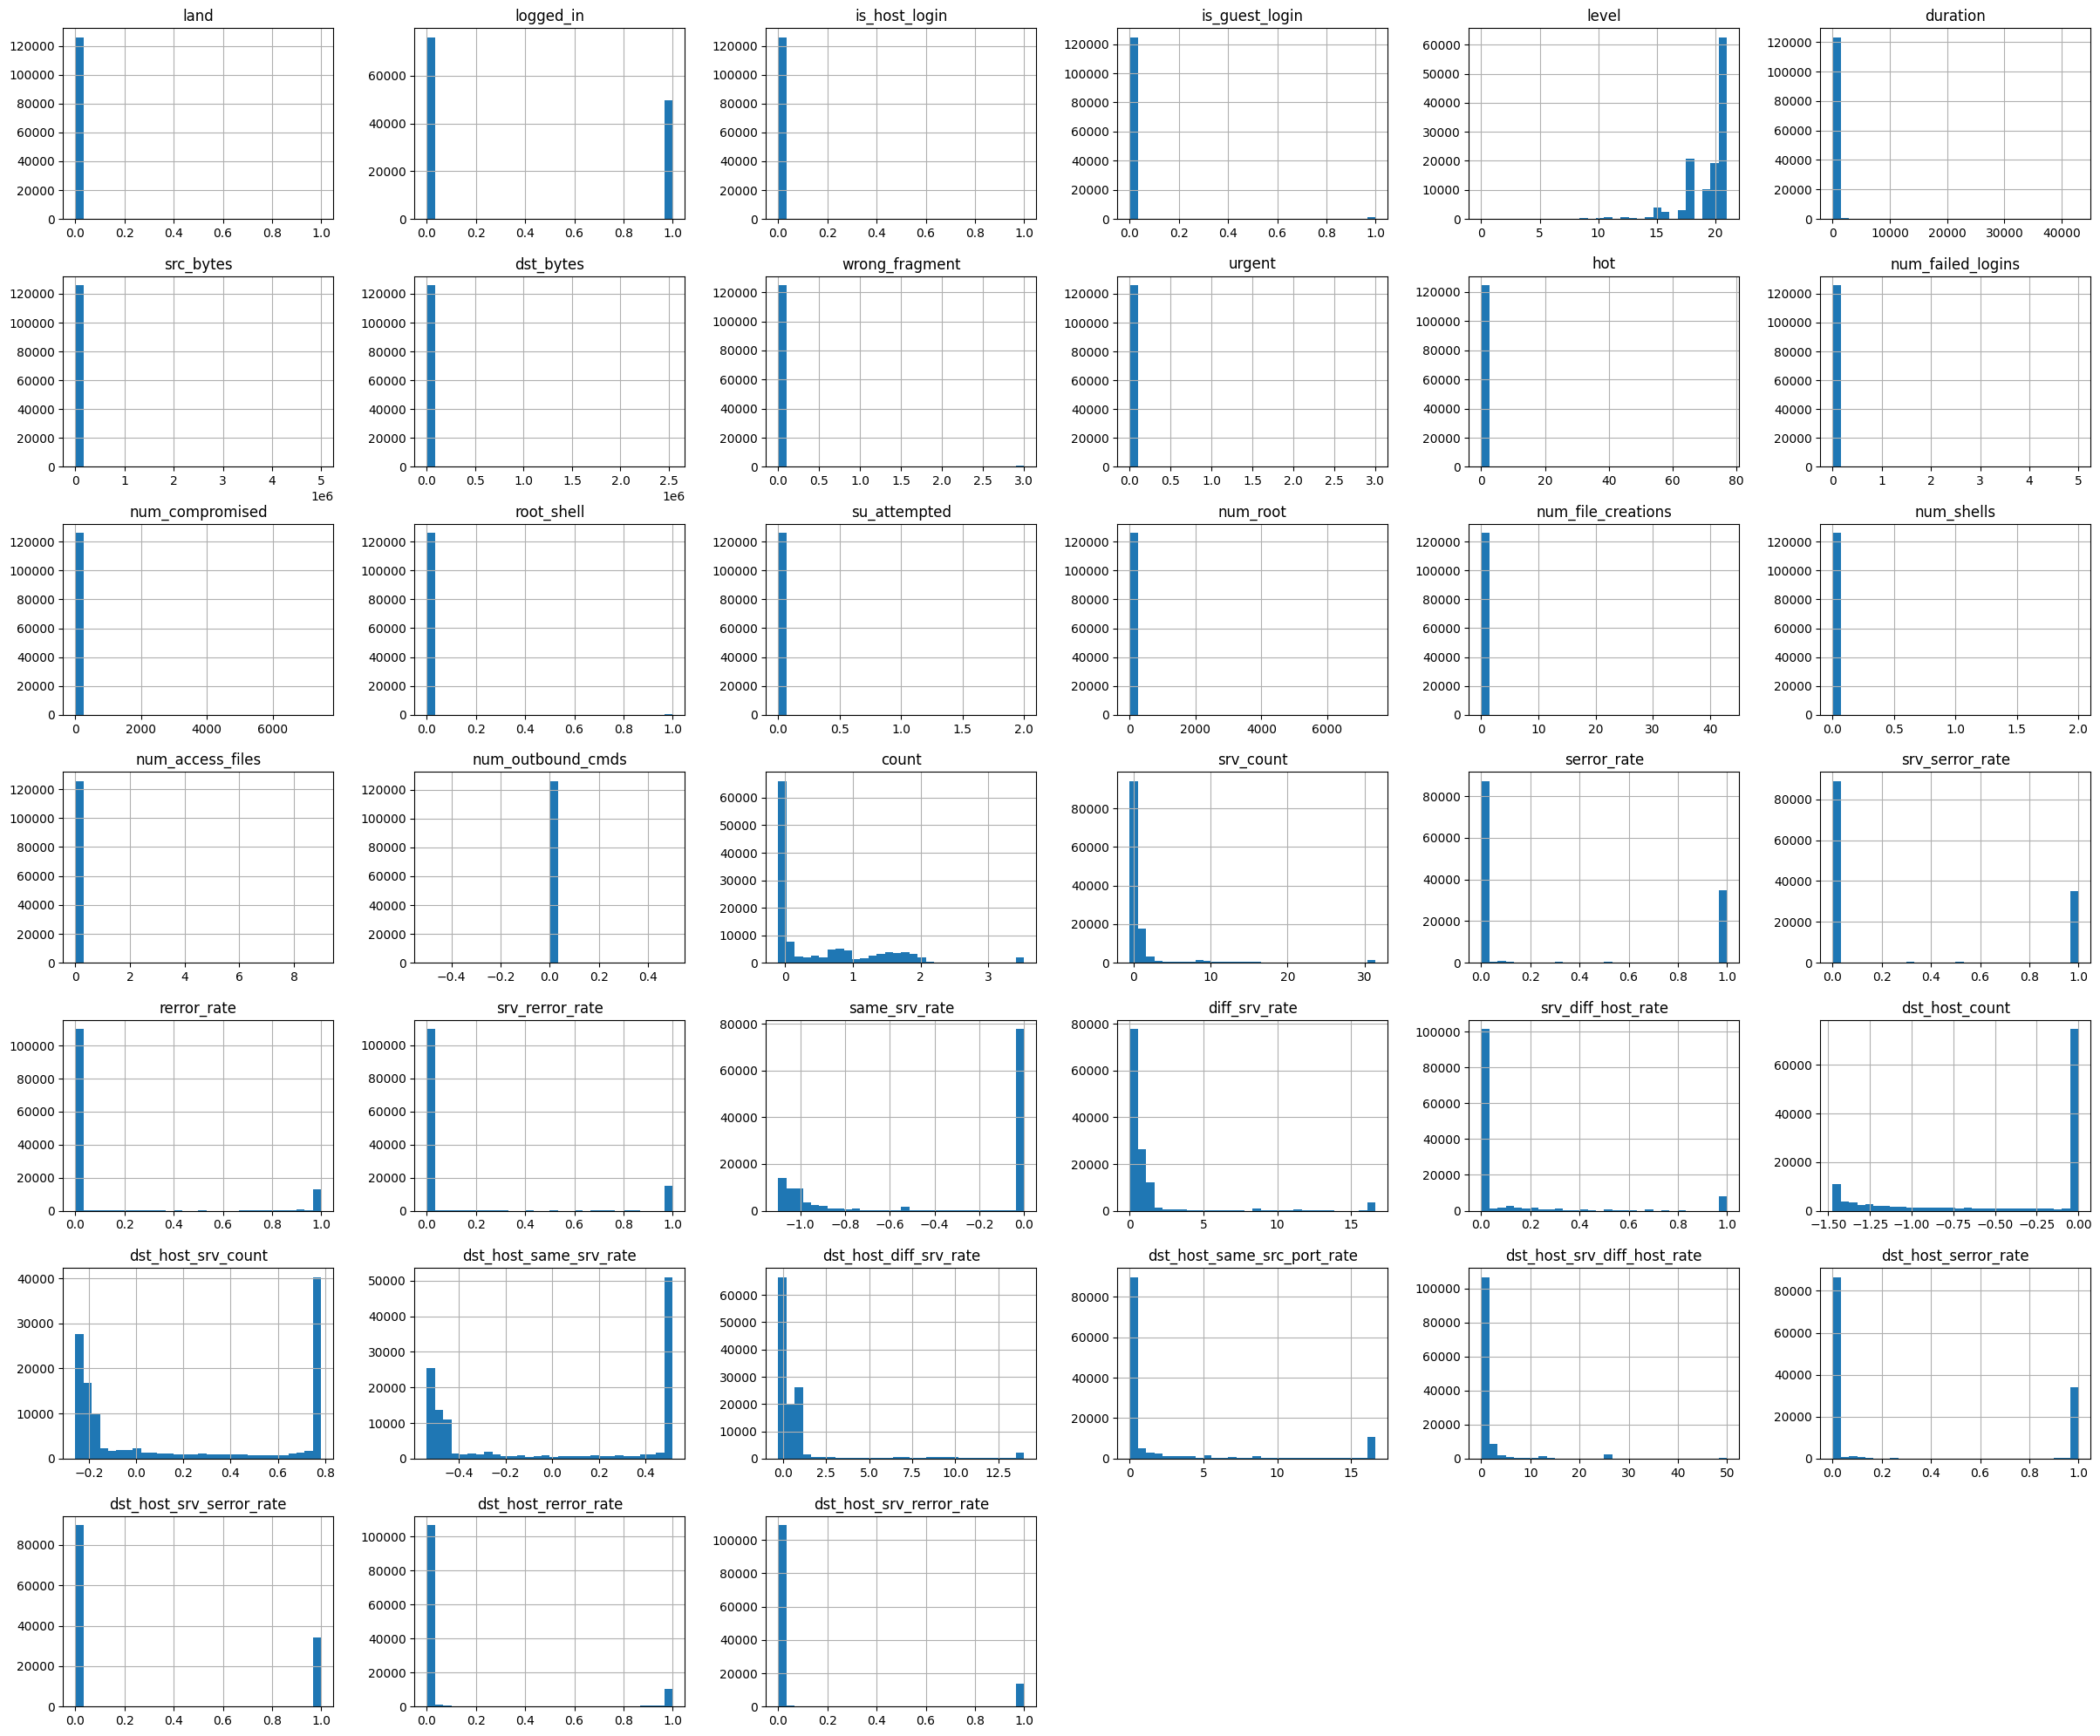

In [32]:
# Histogram
data_train.hist(bins=30, figsize=(30, 25));
plt.show();

<Figure size 2000x4000 with 0 Axes>

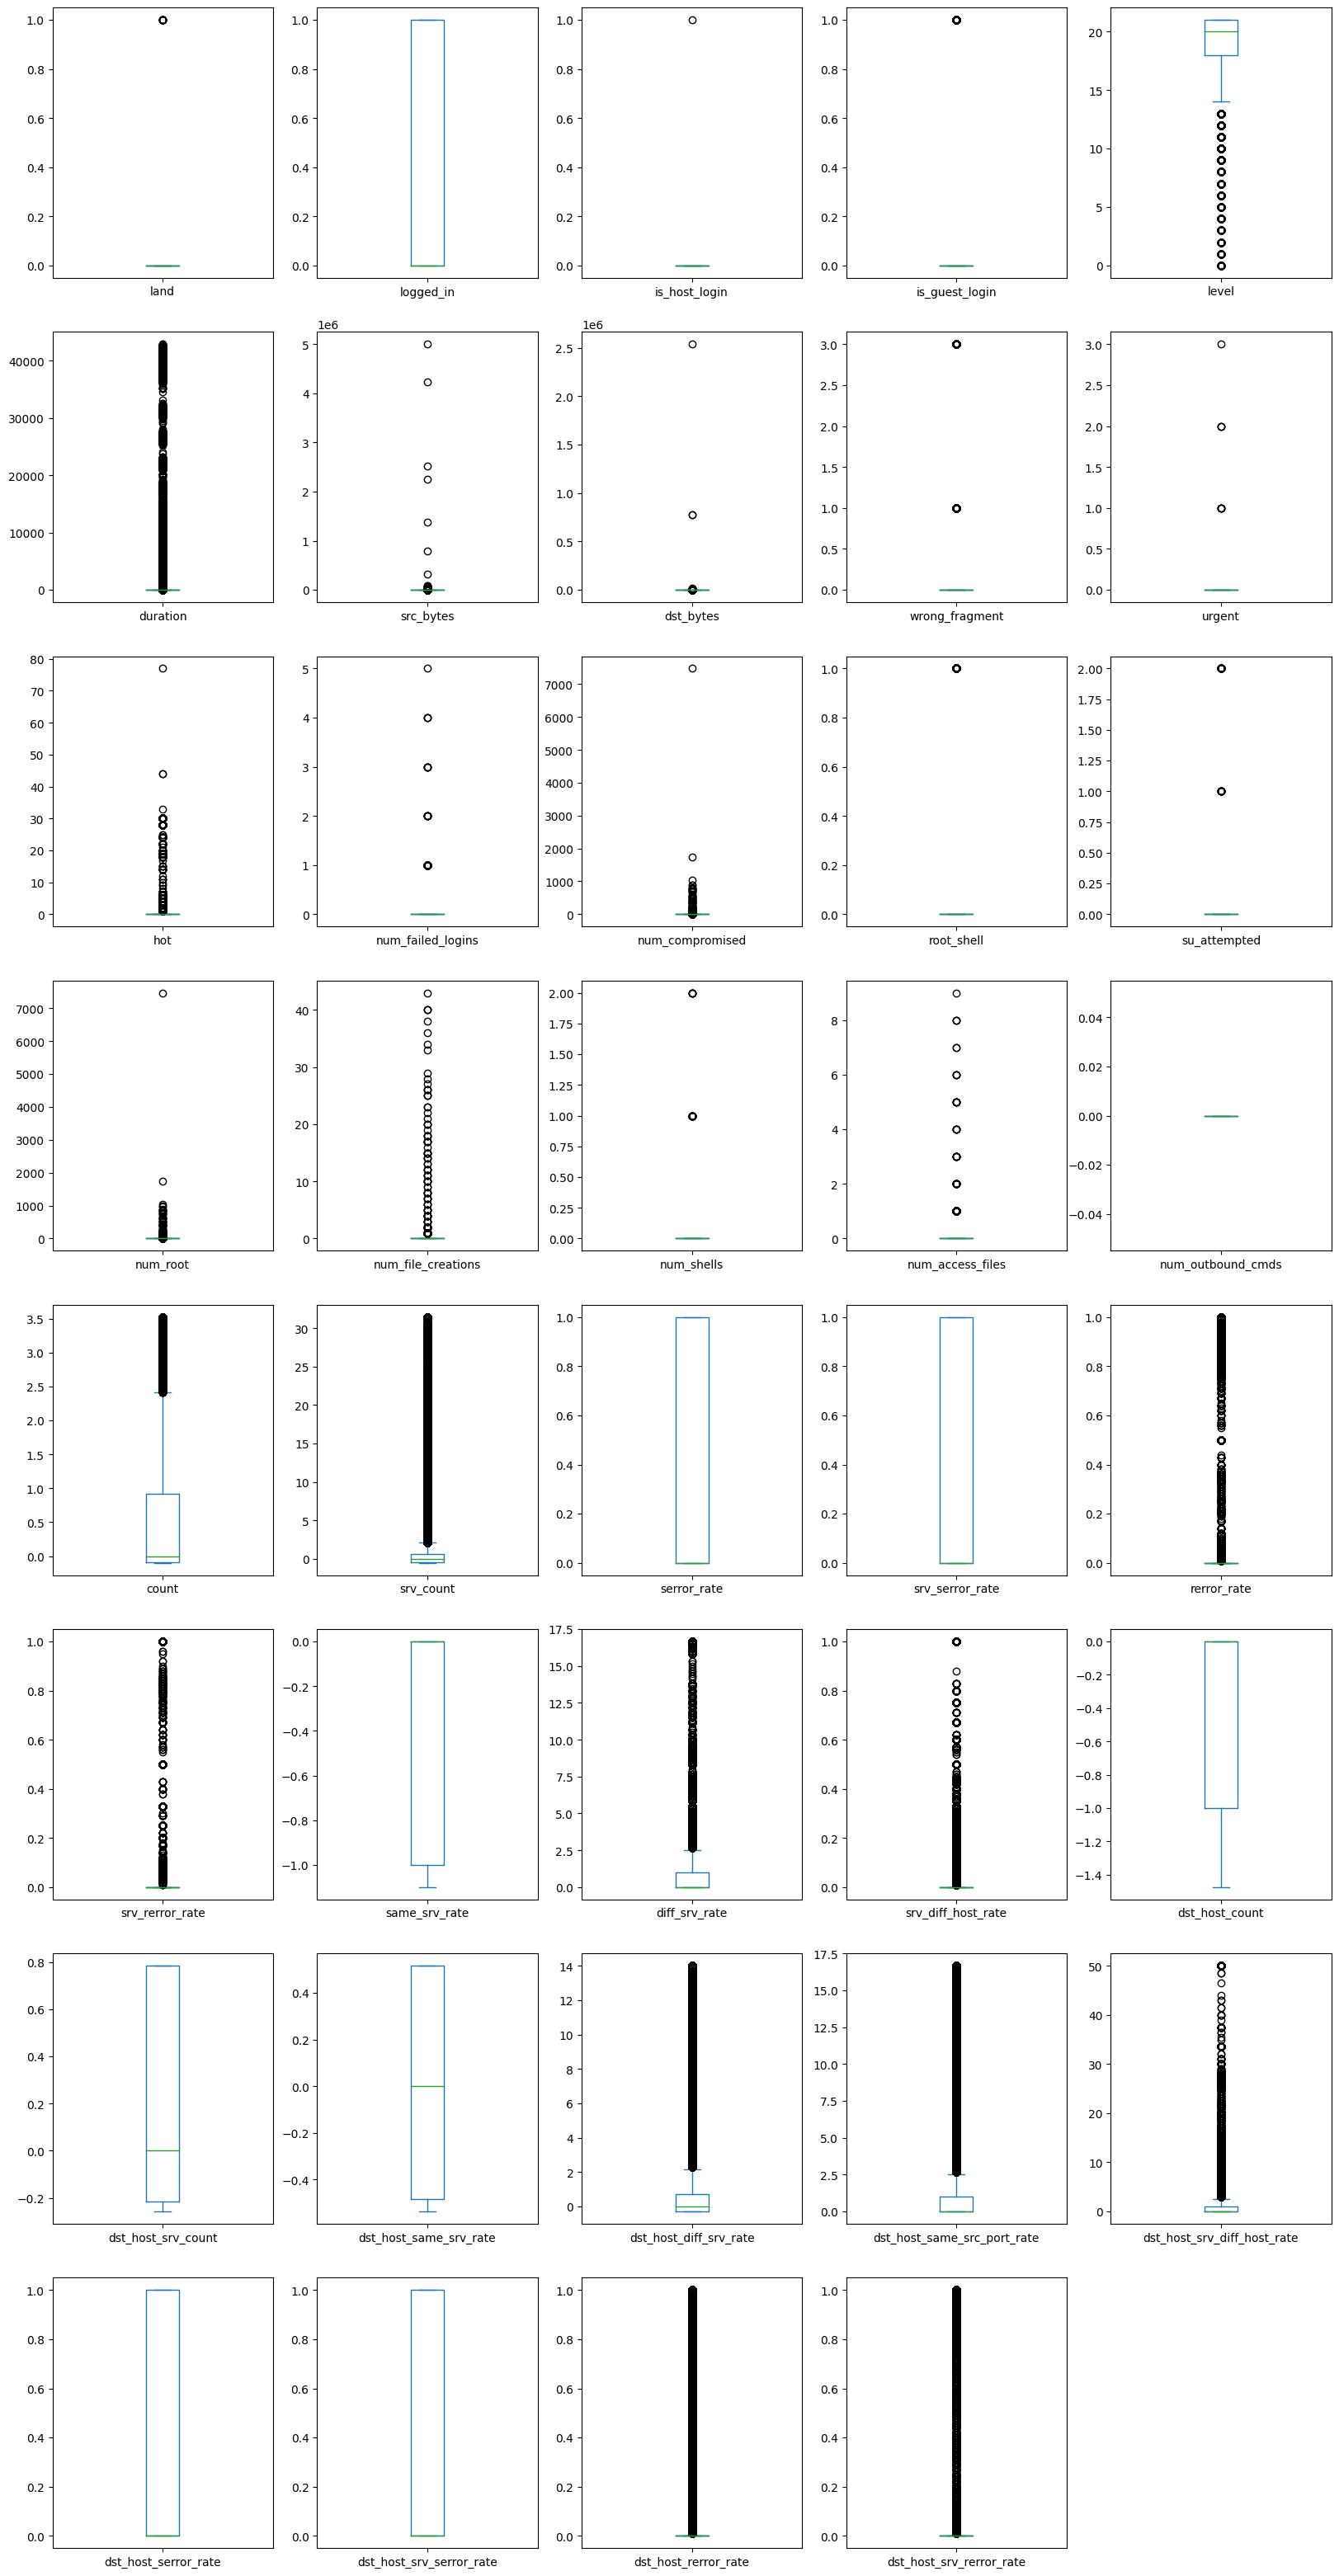

In [33]:
plt.figure(figsize=(20, 40));
data_train.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40));
plt.show();

In [34]:
# Bar Chart Graph
def bar_graph(feature):
    data_train[feature].value_counts().plot(kind="bar")

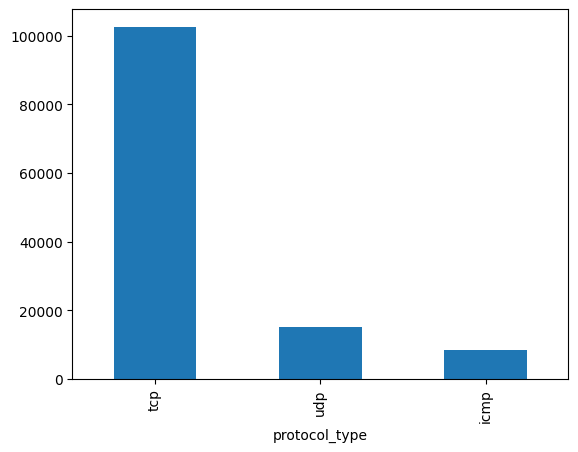

In [35]:
bar_graph('protocol_type')

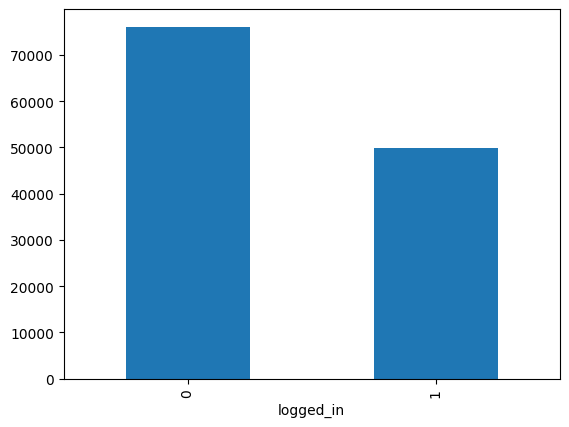

In [36]:
bar_graph('logged_in')
# logged_in (1 if successfully logged in; 0 otherwise): We notice that just 80000 packets are successfully logged in.

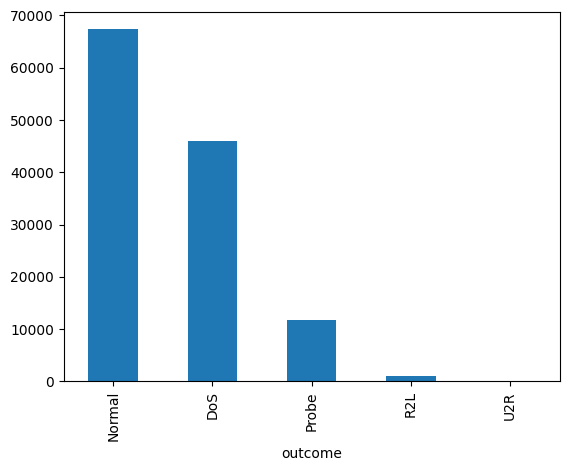

In [37]:
bar_graph('outcome')

In [38]:
# Pie Chart Graph 
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

In [39]:
data_train['outcome'].unique()

array(['Normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

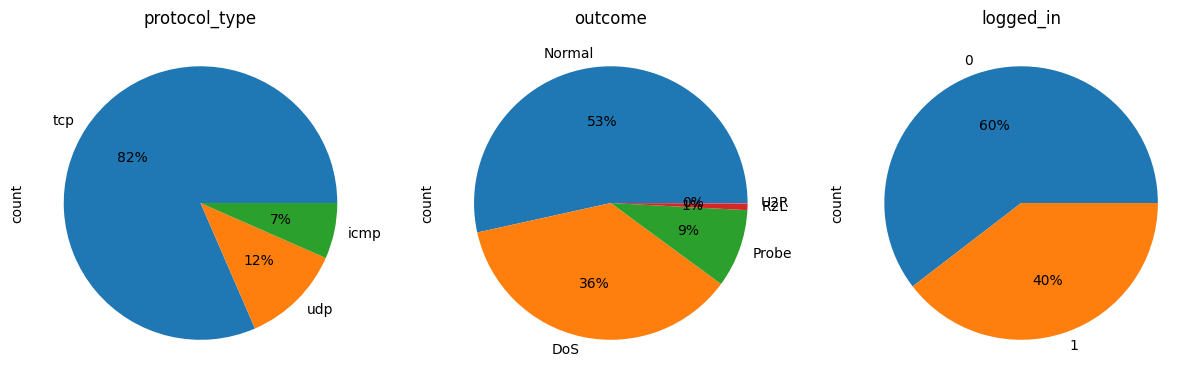

In [40]:
pie_plot(data_train, ['protocol_type', 'outcome', 'logged_in'], 1, 3)

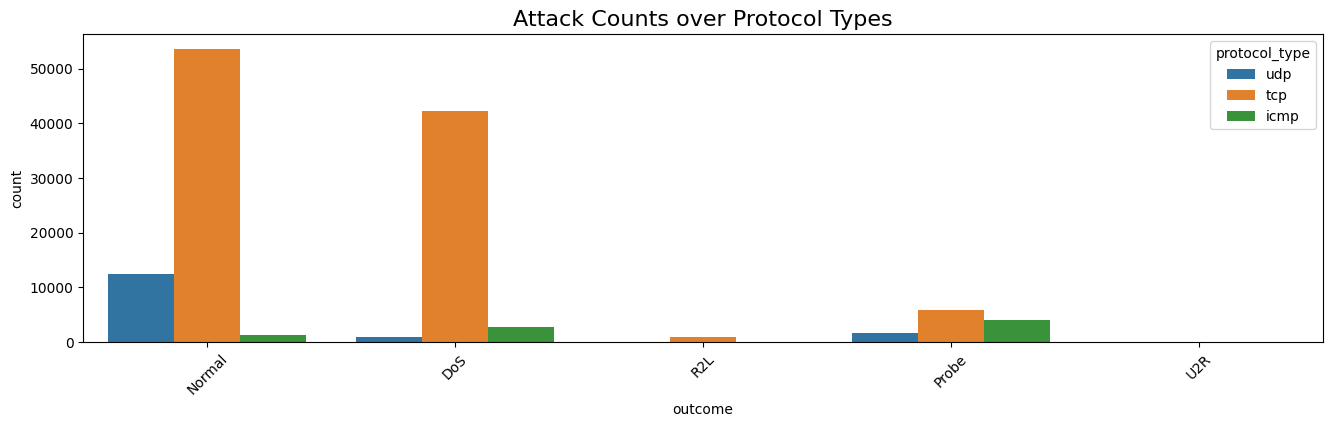

In [41]:
plt.figure(figsize=(16,4))
sns.countplot(x='outcome',data=data_train,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

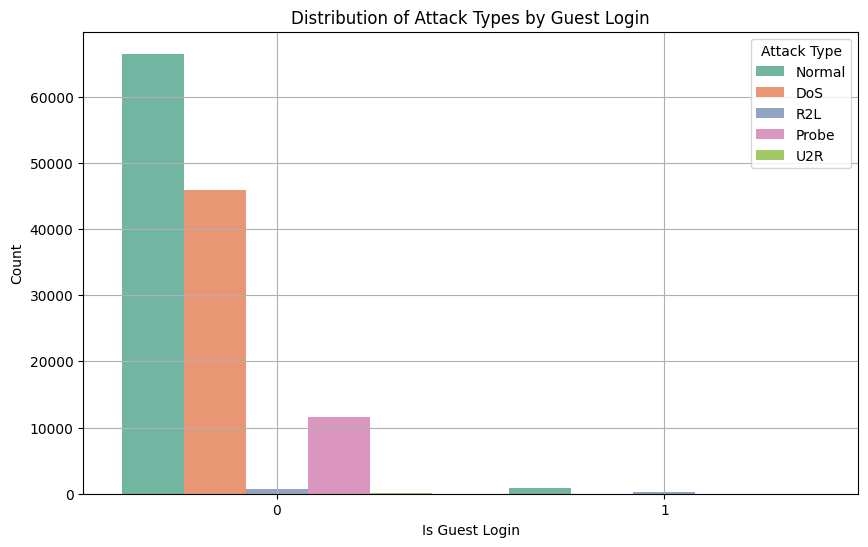

In [42]:
# Distribution of Attack Types by Guest Login
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='outcome', data=data_train, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

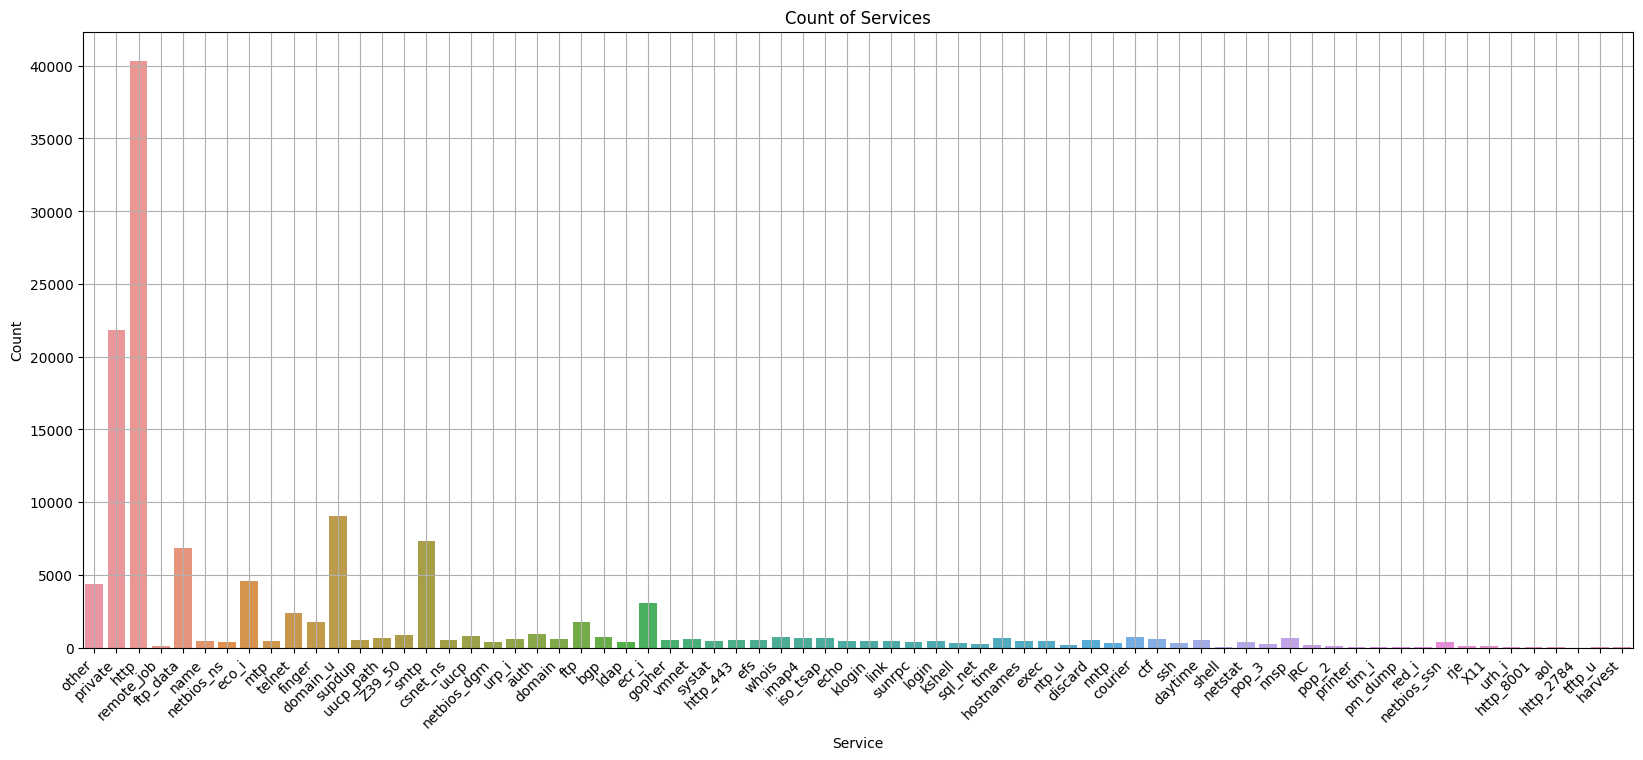

In [43]:
# Service used general
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=data_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

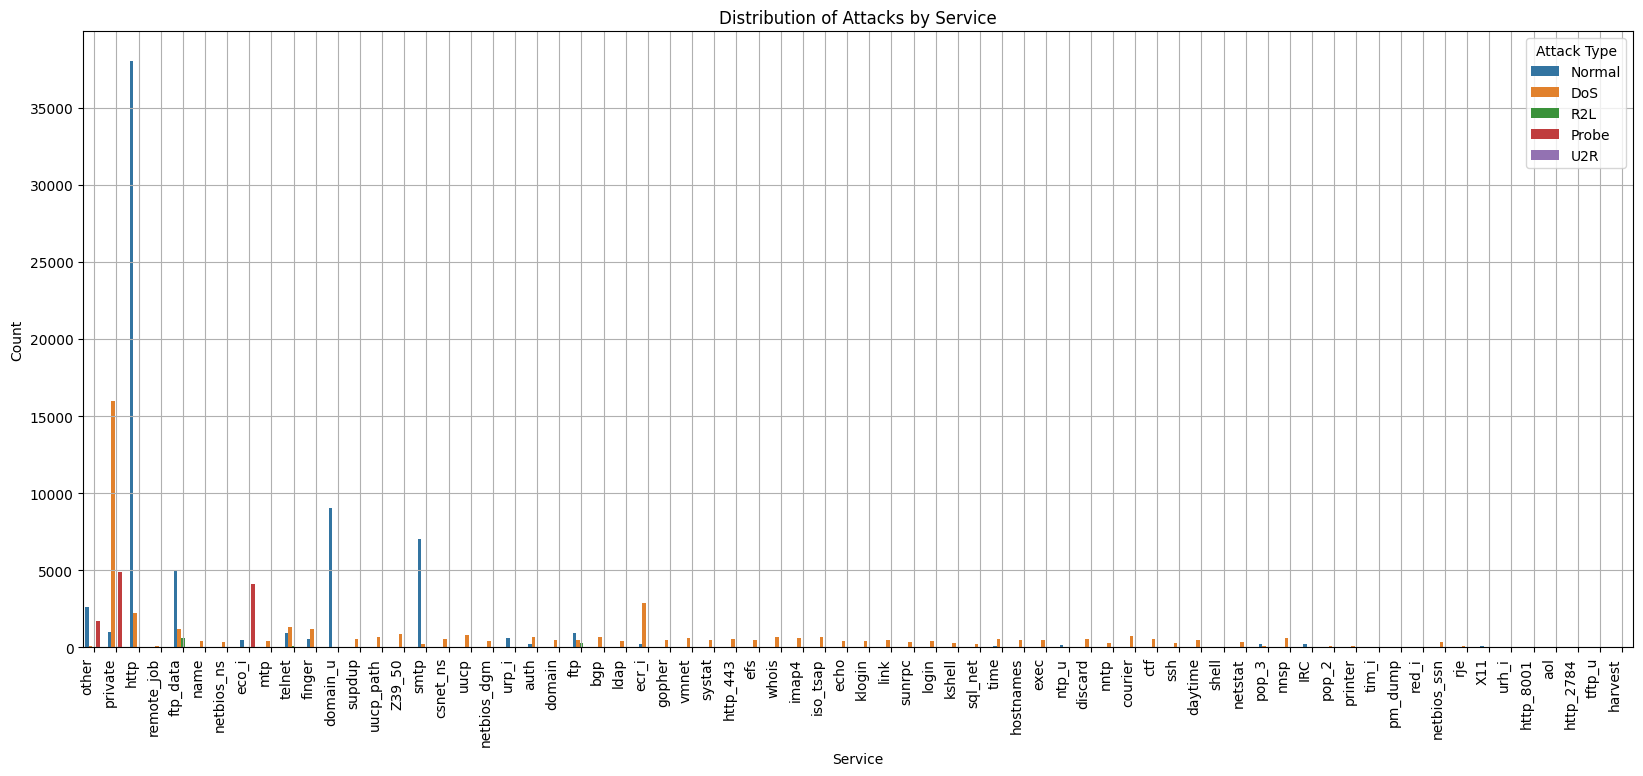

In [44]:
# Service used effect on attacks
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='outcome', data=data_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

# Data Correlation

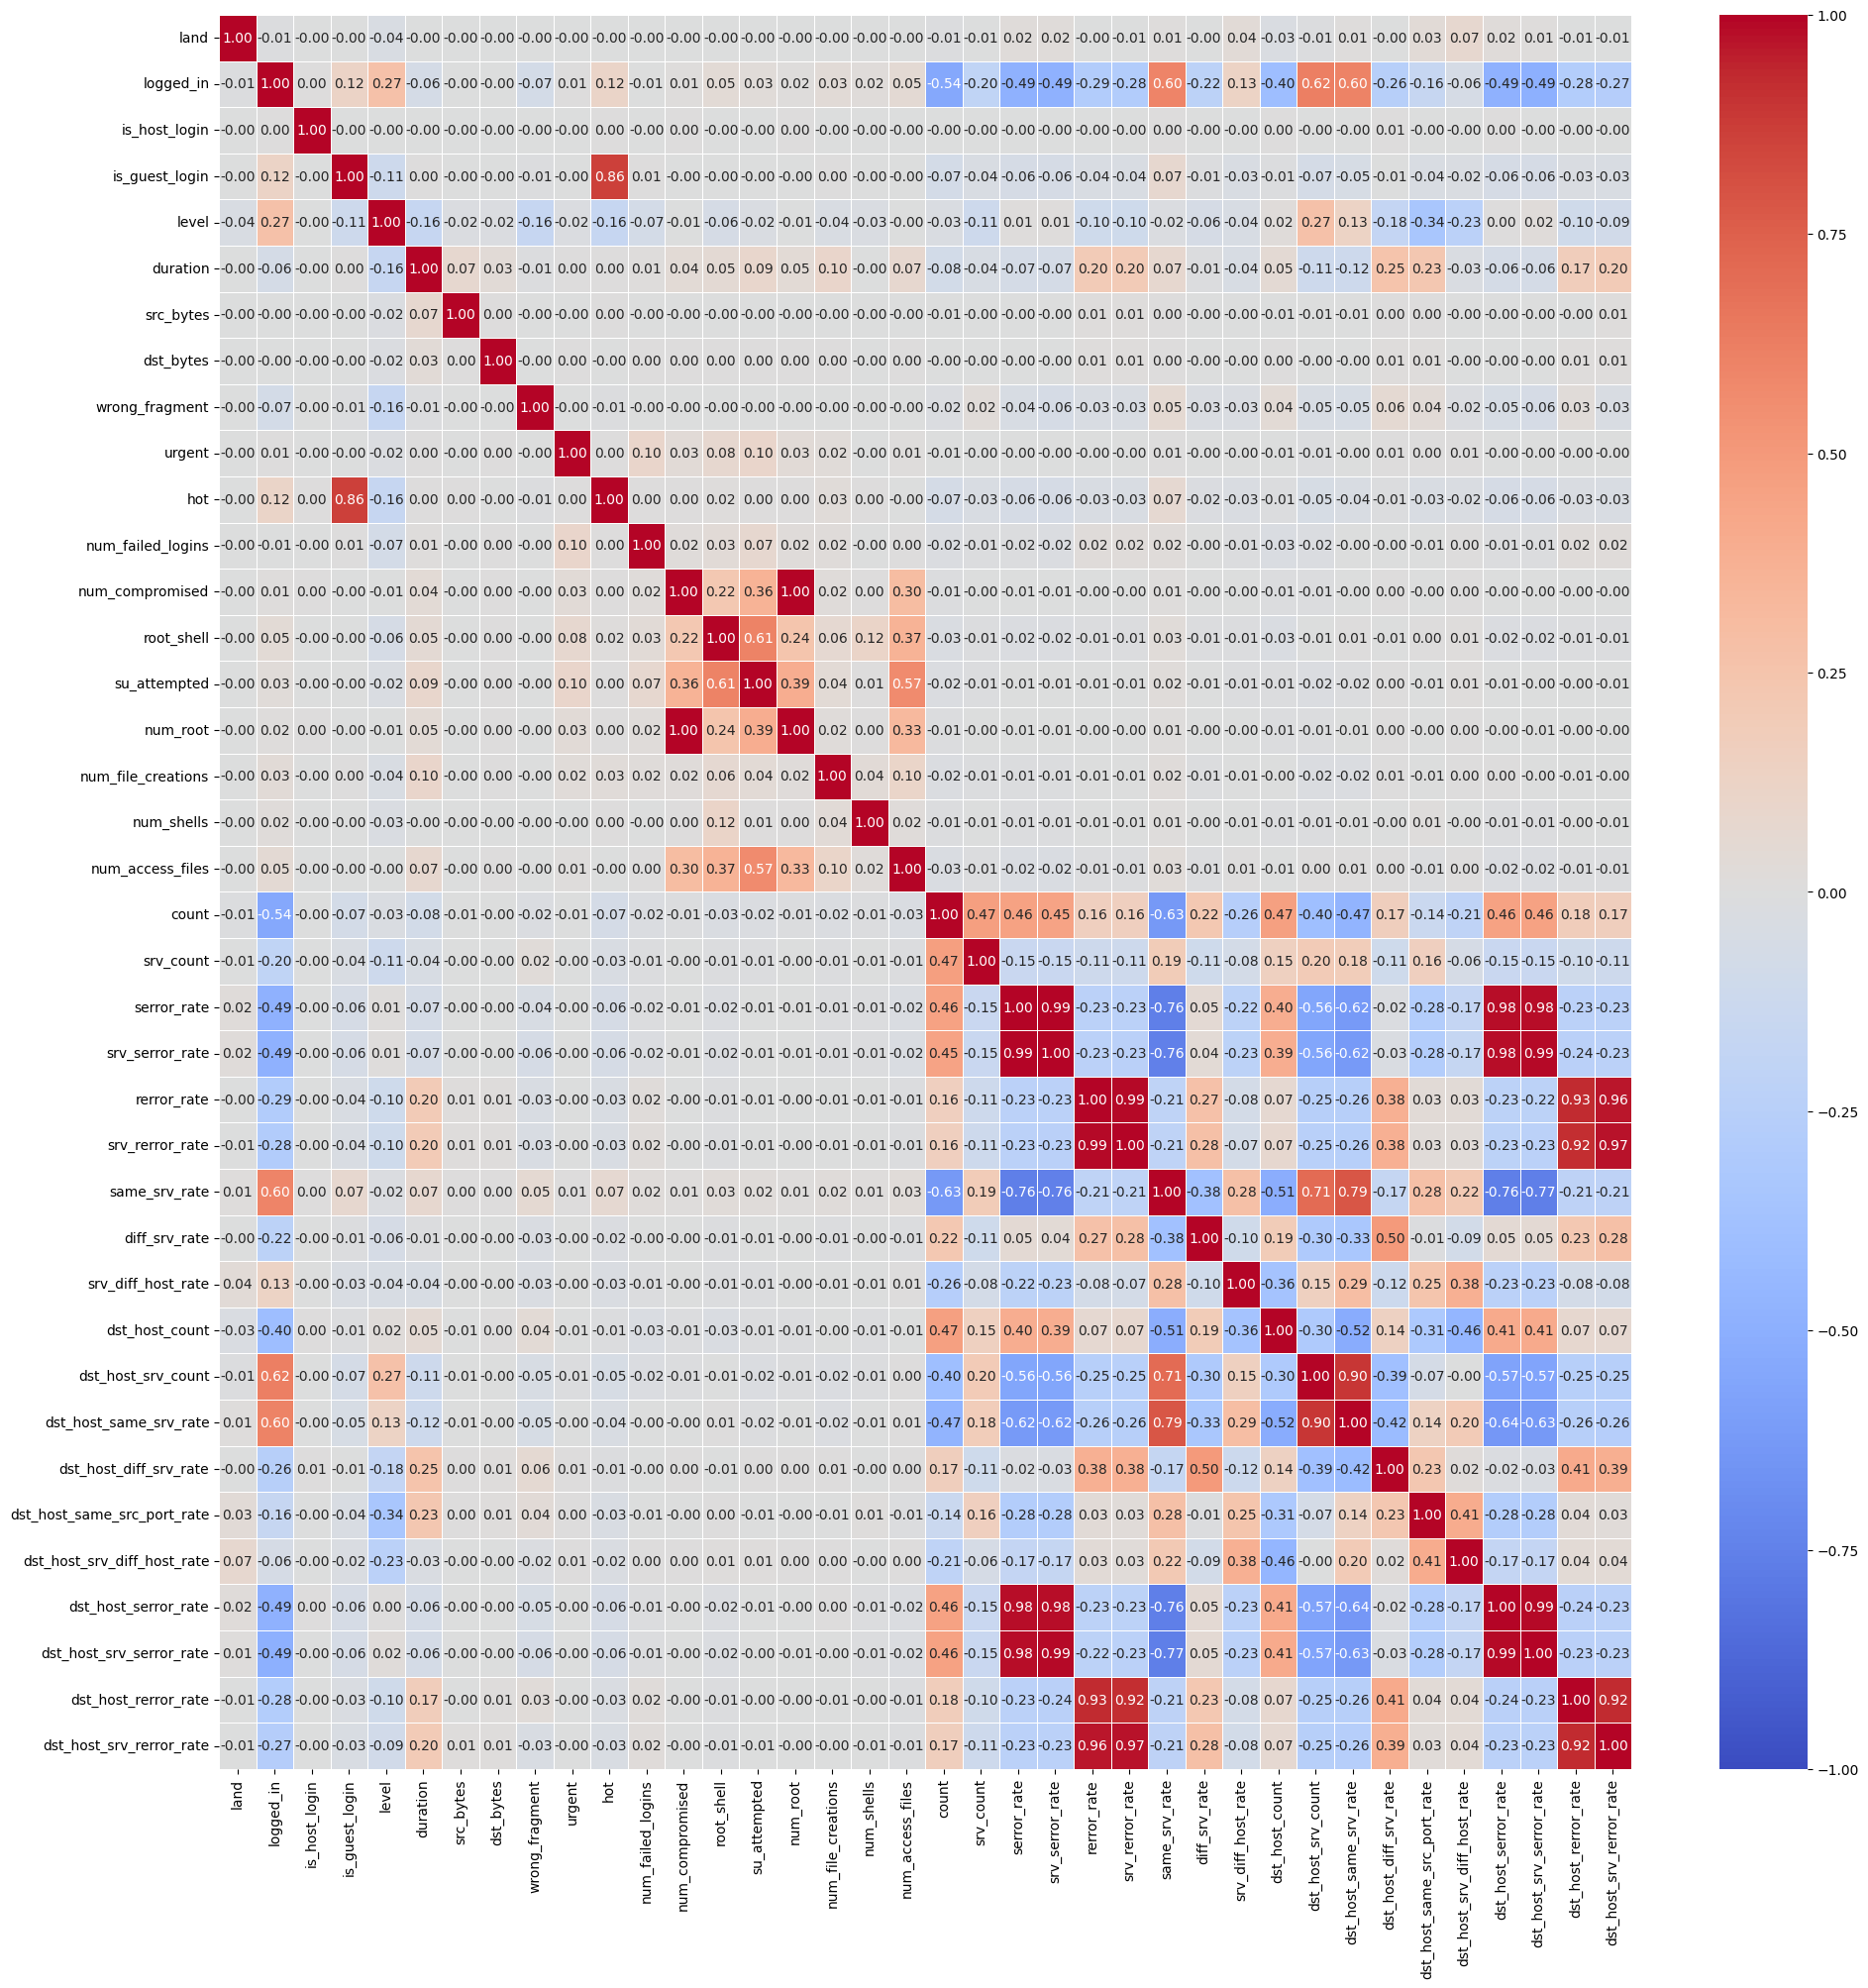

In [45]:
df = data_train.dropna(axis=1)
# Keep columns where there are more than 1 unique value
df = df[[col for col in df if df[col].nunique() > 1]]
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
plt.figure(figsize=(23, 23))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.show()

# Principal Component Analysis

In [46]:
from sklearn.preprocessing import LabelEncoder

# Assuming data_train is your original DataFrame
data_train_Dt_reduction = data_train[['is_guest_login', 'logged_in', 'srv_diff_host_rate', 'level', 'service', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'num_shells']]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
data_train_Dt_reduction['service'] = label_encoder.fit_transform(data_train_Dt_reduction['service'])

In [47]:
data_train_Dt_reduction.shape

(125972, 8)

In [48]:
x = scaled_train.drop('outcome' , axis = 1).values
y = scaled_train['outcome'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))
print(data_train_Dt_reduction.shape)
print(x_reduced.shape)

Number of original features is 123 and of reduced features is 20
(125972, 8)
(125972, 20)


Information about columns selected by PCA

In [49]:
# Get the loading matrix
loading_matrix = pca.components_

# Create a DataFrame for better visualization
features = scaled_train.drop('outcome', axis=1).columns
loading_df = pd.DataFrame(loading_matrix.T, index=features, columns=[f'PC{i+1}' for i in range(loading_matrix.shape[0])])

# Sum the absolute values of the loadings for each feature across all principal components
loading_sums = loading_df.abs().sum(axis=1)

# Sort the features by their aggregated influence and select the top 20
top_20_features = loading_sums.sort_values(ascending=False).head(20)

print("Top 20 contributing features across all principal components:")
print(top_20_features)

Top 20 contributing features across all principal components:
count                          2.683755
dst_host_same_src_port_rate    2.331103
level                          2.323202
diff_srv_rate                  2.282635
dst_host_diff_srv_rate         2.256442
dst_host_count                 2.235342
dst_host_srv_diff_host_rate    2.073506
srv_count                      1.987120
hot                            1.831851
service_private                1.757176
logged_in                      1.670781
service_http                   1.581862
num_compromised                1.513548
num_root                       1.509106
flag_SF                        1.404925
dst_host_srv_count             1.379109
dst_host_same_srv_rate         1.367859
num_file_creations             1.208715
protocol_type_udp              1.109871
srv_serror_rate                1.042316
dtype: float64


# Data Splitting

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming y contains the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform the train-test split
x_train, x_test, y_train, y_test = train_test_split(data_train_Dt_reduction, y_encoded, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y_encoded, test_size=0.2, random_state=42)


# Classification Method

In [51]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

kernal_evals = dict()

def evaluate_classification(model, model_name, X_train, X_test, y_train, y_test):
    # Record the start time for training
    start_train_time = time.time()
    model.fit(X_train, y_train)
    end_train_time = time.time()

    # Calculate training time
    train_time = end_train_time - start_train_time

    # Record the start time for testing
    start_test_time = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    end_test_time = time.time()

    # Calculate testing time
    test_time = end_test_time - start_test_time

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')

    train_recall = recall_score(y_train, y_pred_train, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')

    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    kernal_evals[str(model_name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_time, test_time]

    print(f"{model_name} - Training accuracy: {train_accuracy:.4f}")
    print(f"{model_name} - Test accuracy: {test_accuracy:.4f}")
    print(f"{model_name} - Training precision: {train_precision:.4f}")
    print(f"{model_name} - Test precision: {test_precision:.4f}")
    print(f"{model_name} - Training recall: {train_recall:.4f}")
    print(f"{model_name} - Test recall: {test_recall:.4f}")
    print(f"{model_name} - Training F1 score: {train_f1:.4f}")
    print(f"{model_name} - Test F1 score: {test_f1:.4f}")
    print(f"{model_name} - Training time: {train_time:.4f} seconds")
    print(f"{model_name} - Testing time: {test_time:.4f} seconds")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(False)
    disp.plot(ax=ax)
    plt.show()

# Classification outcome column (Using Decision Tress Columns)

Note: X ==> 8 Columns Selected by DT  &&  Y ==> outcome Column

Logistic Regression

LR with Features DT - Training accuracy: 0.8005
LR with Features DT - Test accuracy: 0.7975
LR with Features DT - Training precision: 0.8171
LR with Features DT - Test precision: 0.8143
LR with Features DT - Training recall: 0.8005
LR with Features DT - Test recall: 0.7975
LR with Features DT - Training F1 score: 0.8004
LR with Features DT - Test F1 score: 0.7974
LR with Features DT - Training time: 4.2430 seconds
LR with Features DT - Testing time: 0.0346 seconds


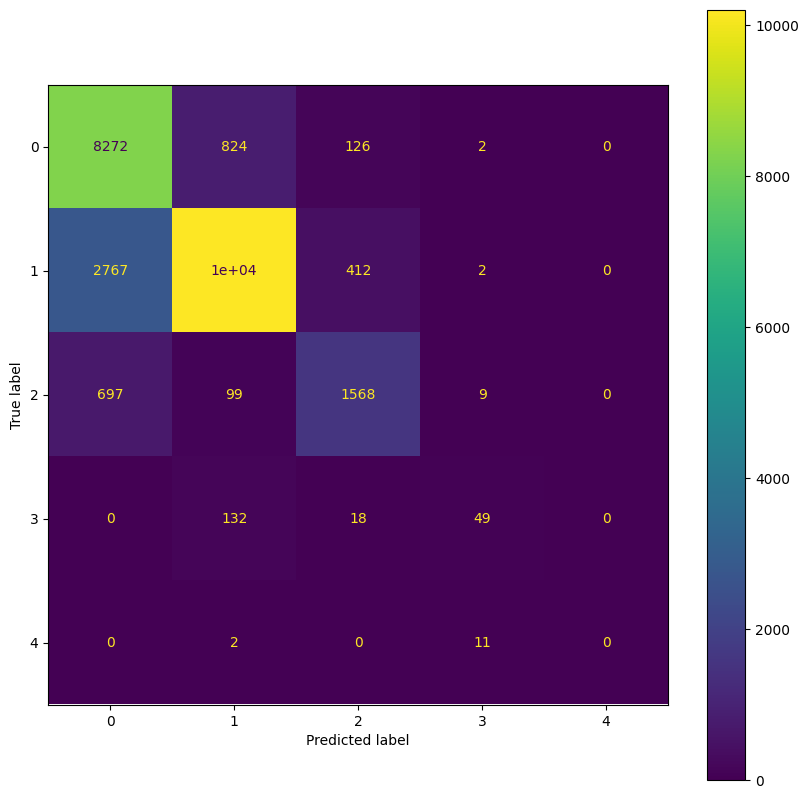

-----------------------------------------------------------------------------------------------------------------------------
LR with PCA Features - Training accuracy: 0.5125
LR with PCA Features - Test accuracy: 0.5103
LR with PCA Features - Training precision: 0.3883
LR with PCA Features - Test precision: 0.3873
LR with PCA Features - Training recall: 0.5125
LR with PCA Features - Test recall: 0.5103
LR with PCA Features - Training F1 score: 0.3854
LR with PCA Features - Test F1 score: 0.3826
LR with PCA Features - Training time: 9.2377 seconds
LR with PCA Features - Testing time: 0.0259 seconds


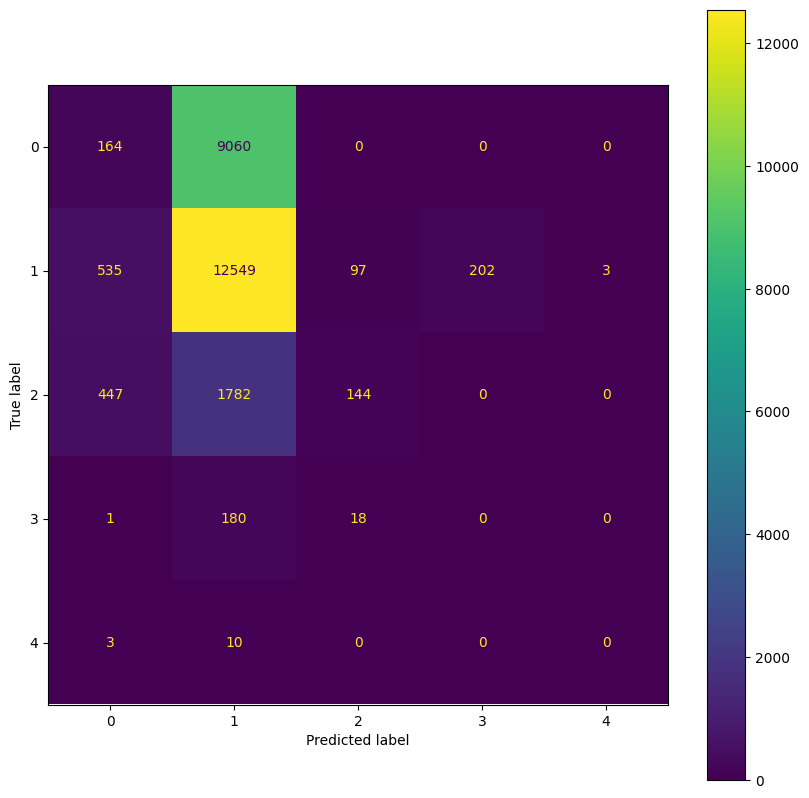

In [52]:
from sklearn.linear_model import LogisticRegression

# Fit and evaluate Logistic Regression model using manually selected features
lr_manual = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr_manual, "LR with Features DT", x_train, x_test, y_train, y_test)
print('-----------------------------------------------------------------------------------------------------------------------------')
# Fit and evaluate Logistic Regression model using PCA selected features
lr_pca = LogisticRegression().fit(x_train_reduced, y_train_reduced)
evaluate_classification(lr_pca, "LR with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)


k-nearest neighbors

KNN with Features DT - Training accuracy: 0.9847
KNN with Features DT - Test accuracy: 0.9819
KNN with Features DT - Training precision: 0.9849
KNN with Features DT - Test precision: 0.9821
KNN with Features DT - Training recall: 0.9847
KNN with Features DT - Test recall: 0.9819
KNN with Features DT - Training F1 score: 0.9847
KNN with Features DT - Test F1 score: 0.9819
KNN with Features DT - Training time: 0.8394 seconds
KNN with Features DT - Testing time: 30.1772 seconds


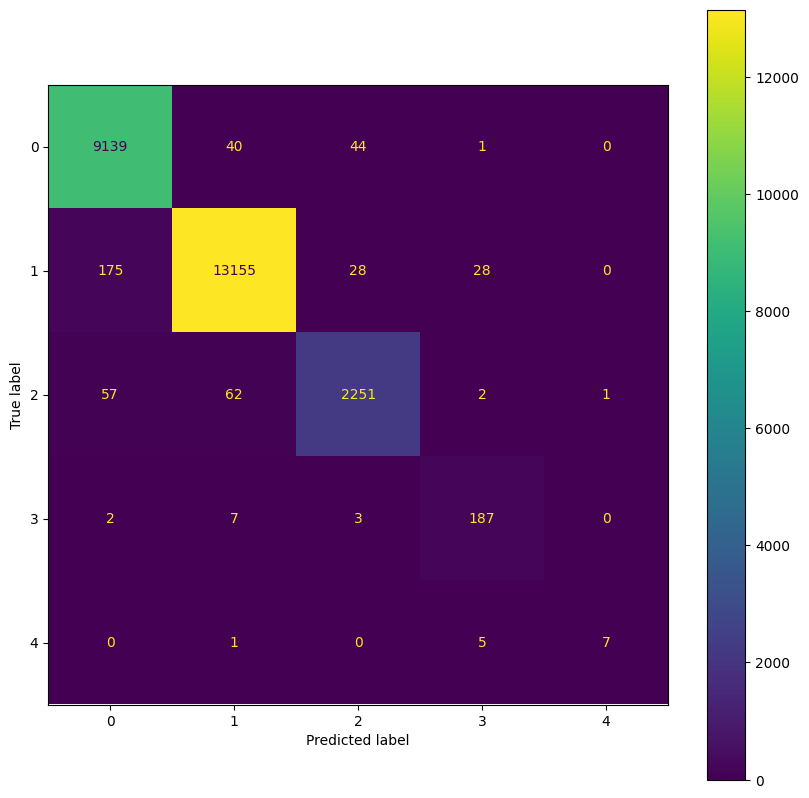

-----------------------------------------------------------------------------------------------------------------------------
KNN with PCA Features - Training accuracy: 0.9953
KNN with PCA Features - Test accuracy: 0.9928
KNN with PCA Features - Training precision: 0.9953
KNN with PCA Features - Test precision: 0.9928
KNN with PCA Features - Training recall: 0.9953
KNN with PCA Features - Test recall: 0.9928
KNN with PCA Features - Training F1 score: 0.9953
KNN with PCA Features - Test F1 score: 0.9928
KNN with PCA Features - Training time: 0.0140 seconds
KNN with PCA Features - Testing time: 37.4883 seconds


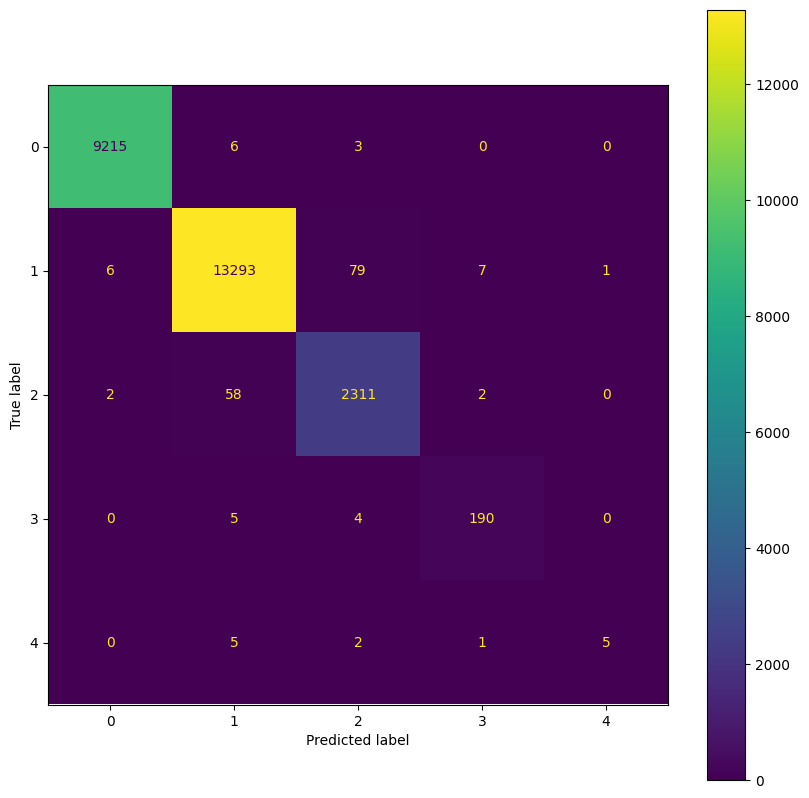

In [53]:
# Fit and evaluate KNN model using manually selected features
knn_manual = KNeighborsClassifier().fit(x_train, y_train)
evaluate_classification(knn_manual, "KNN with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate KNN model using PCA selected features
knn_pca = KNeighborsClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(knn_pca, "KNN with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)


Naive Bayes

NB with Features DT - Training accuracy: 0.7721
NB with Features DT - Test accuracy: 0.7684
NB with Features DT - Training precision: 0.8391
NB with Features DT - Test precision: 0.8365
NB with Features DT - Training recall: 0.7721
NB with Features DT - Test recall: 0.7684
NB with Features DT - Training F1 score: 0.7835
NB with Features DT - Test F1 score: 0.7796
NB with Features DT - Training time: 0.0539 seconds
NB with Features DT - Testing time: 0.1207 seconds


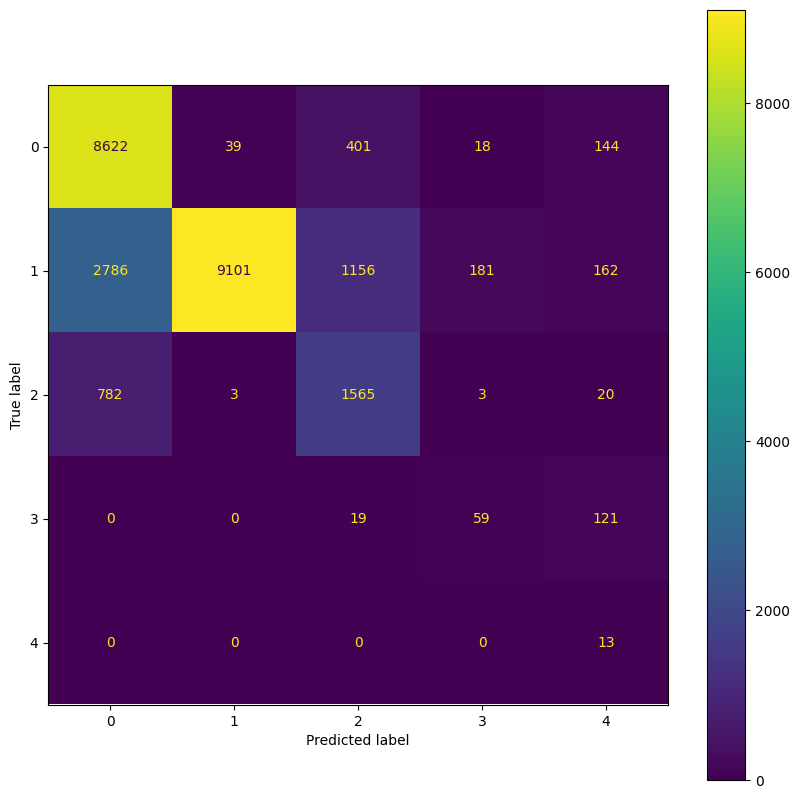

-----------------------------------------------------------------------------------------------------------------------------
NB with PCA Features - Training accuracy: 0.4847
NB with PCA Features - Test accuracy: 0.4839
NB with PCA Features - Training precision: 0.7216
NB with PCA Features - Test precision: 0.7157
NB with PCA Features - Training recall: 0.4847
NB with PCA Features - Test recall: 0.4839
NB with PCA Features - Training F1 score: 0.4250
NB with PCA Features - Test F1 score: 0.4219
NB with PCA Features - Training time: 0.0967 seconds
NB with PCA Features - Testing time: 0.2828 seconds


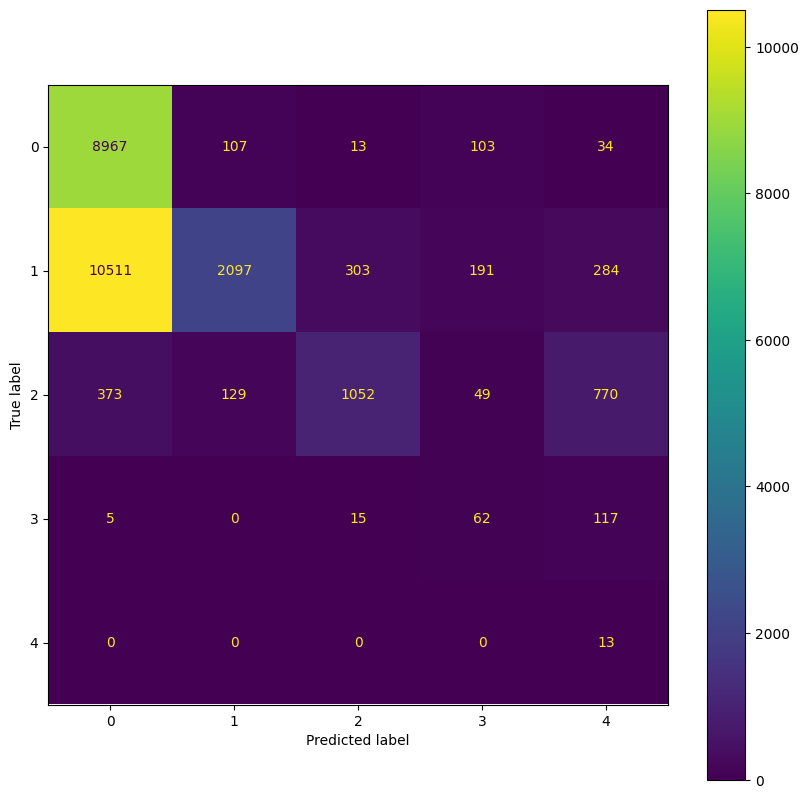

In [54]:
# Fit and evaluate Naiive Bayes model using manually selected features
gnb_manual = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb_manual, "NB with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate Naiive Bayes model using PCA selected features
gnb_pca = GaussianNB().fit(x_train_reduced, y_train_reduced)
evaluate_classification(gnb_pca, "NB with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Support Vector Machines

SVM with Features DT - Training accuracy: 0.8225
SVM with Features DT - Test accuracy: 0.8200
SVM with Features DT - Training precision: 0.8439
SVM with Features DT - Test precision: 0.8416
SVM with Features DT - Training recall: 0.8225
SVM with Features DT - Test recall: 0.8200
SVM with Features DT - Training F1 score: 0.8235
SVM with Features DT - Test F1 score: 0.8208
SVM with Features DT - Training time: 1.5854 seconds
SVM with Features DT - Testing time: 0.0280 seconds


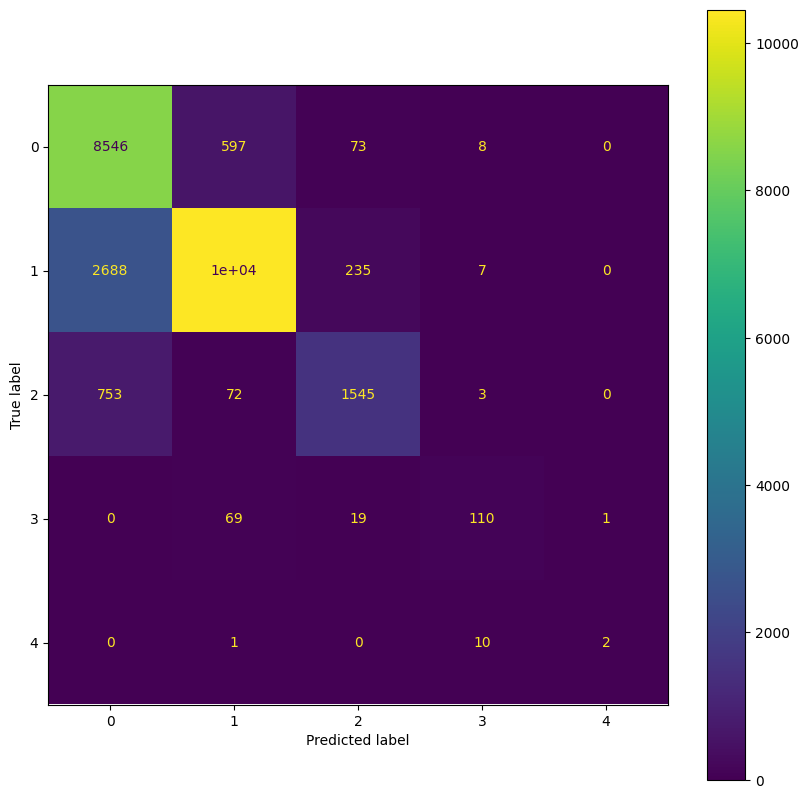

-----------------------------------------------------------------------------------------------------------------------------
SVM with PCA Features - Training accuracy: 0.9676
SVM with PCA Features - Test accuracy: 0.9677
SVM with PCA Features - Training precision: 0.9675
SVM with PCA Features - Test precision: 0.9673
SVM with PCA Features - Training recall: 0.9676
SVM with PCA Features - Test recall: 0.9677
SVM with PCA Features - Training F1 score: 0.9674
SVM with PCA Features - Test F1 score: 0.9674
SVM with PCA Features - Training time: 66.9112 seconds
SVM with PCA Features - Testing time: 0.0269 seconds


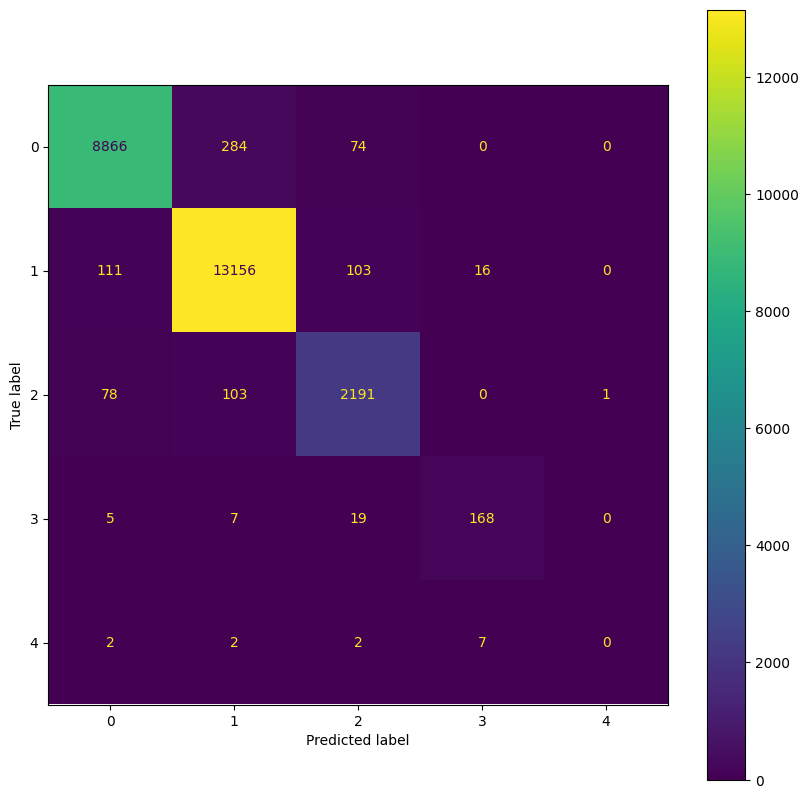

In [55]:
# Fit and evaluate SVM model using manually selected features
svc_manual = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(svc_manual, "SVM with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate SVM model using PCA selected features
svc_pca = svm.LinearSVC().fit(x_train_reduced, y_train_reduced)
evaluate_classification(svc_pca, "SVM with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Decision Tree

DT with Features DT - Training accuracy: 0.9904
DT with Features DT - Test accuracy: 0.9869
DT with Features DT - Training precision: 0.9905
DT with Features DT - Test precision: 0.9870
DT with Features DT - Training recall: 0.9904
DT with Features DT - Test recall: 0.9869
DT with Features DT - Training F1 score: 0.9904
DT with Features DT - Test F1 score: 0.9869
DT with Features DT - Training time: 0.1474 seconds
DT with Features DT - Testing time: 0.0389 seconds


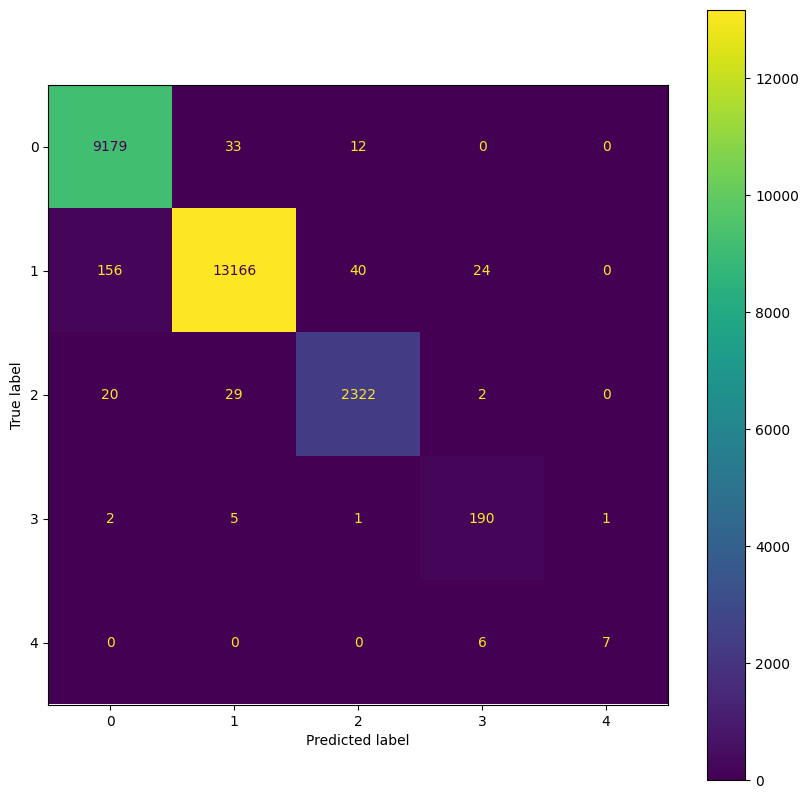

-----------------------------------------------------------------------------------------------------------------------------
DT with PCA Features - Training accuracy: 1.0000
DT with PCA Features - Test accuracy: 0.9978
DT with PCA Features - Training precision: 1.0000
DT with PCA Features - Test precision: 0.9978
DT with PCA Features - Training recall: 1.0000
DT with PCA Features - Test recall: 0.9978
DT with PCA Features - Training F1 score: 1.0000
DT with PCA Features - Test F1 score: 0.9978
DT with PCA Features - Training time: 7.0335 seconds
DT with PCA Features - Testing time: 0.0329 seconds


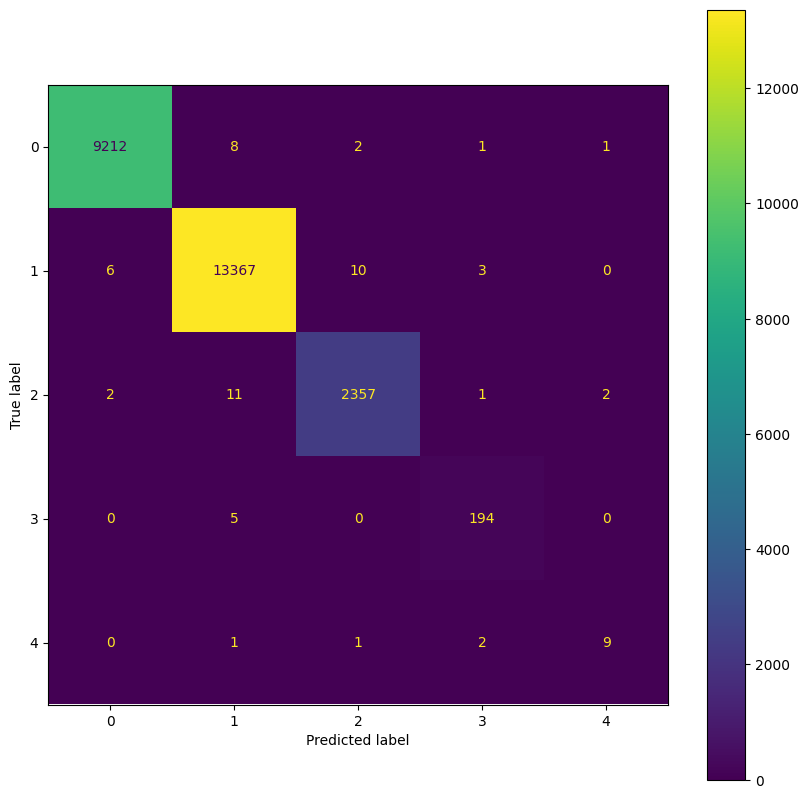

In [56]:
# Fit and evaluate DT model using manually selected features
dt_manual = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(dt_manual, "DT with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate DT model using PCA selected features
dt_pca = DecisionTreeClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(dt_pca, "DT with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Random forest

RF with Features DT - Training accuracy: 0.9904
RF with Features DT - Test accuracy: 0.9879
RF with Features DT - Training precision: 0.9905
RF with Features DT - Test precision: 0.9880
RF with Features DT - Training recall: 0.9904
RF with Features DT - Test recall: 0.9879
RF with Features DT - Training F1 score: 0.9904
RF with Features DT - Test F1 score: 0.9879
RF with Features DT - Training time: 6.7384 seconds
RF with Features DT - Testing time: 2.4702 seconds


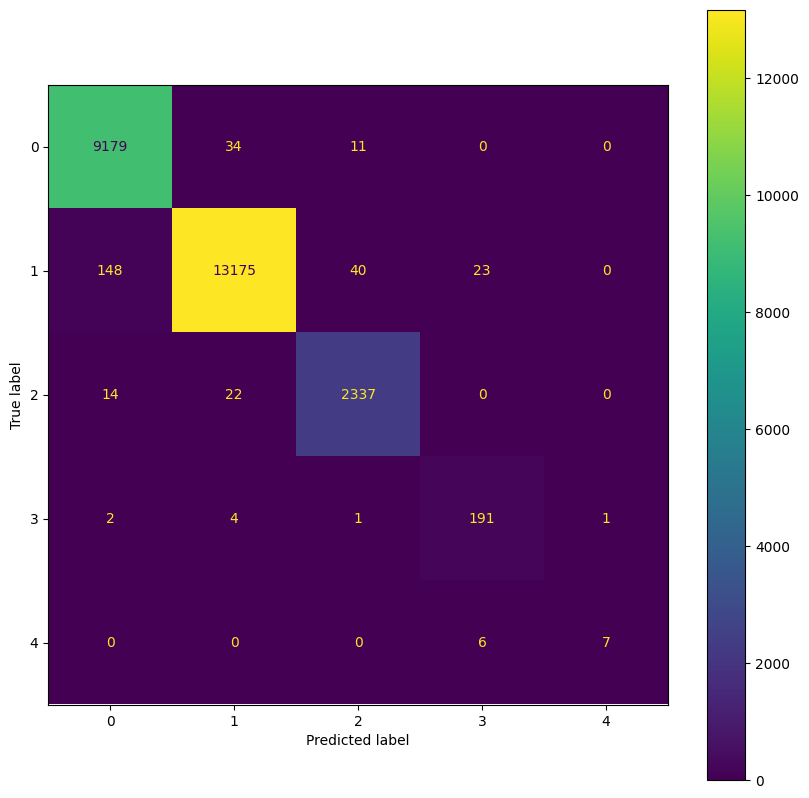

-----------------------------------------------------------------------------------------------------------------------------
RF with PCA Features - Training accuracy: 1.0000
RF with PCA Features - Test accuracy: 0.9990
RF with PCA Features - Training precision: 1.0000
RF with PCA Features - Test precision: 0.9990
RF with PCA Features - Training recall: 1.0000
RF with PCA Features - Test recall: 0.9990
RF with PCA Features - Training F1 score: 1.0000
RF with PCA Features - Test F1 score: 0.9990
RF with PCA Features - Training time: 102.5073 seconds
RF with PCA Features - Testing time: 1.8092 seconds


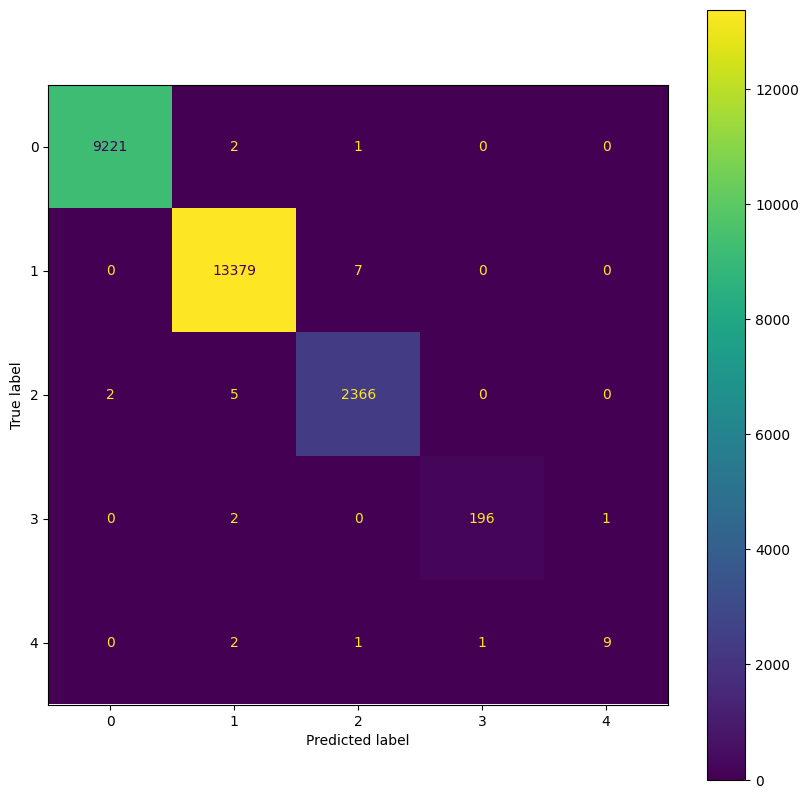

In [57]:
# Fit and evaluate RF model using manually selected features
rf_manual = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf_manual, "RF with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate RF model using PCA selected features
rf_pca = RandomForestClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(rf_pca, "RF with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Handle 100% Accurracy in PCA Features in Random Forest

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters (Adjusted): {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50}
Training Accuracy Random Forest with Best Params (Adjusted) 99.98015420185162  Test Accuracy Random Forest with Best Params (Adjusted) 99.94046437785275
Training Precesion Random Forest with Best Params (Adjusted) 99.972238238623  Test Precesion Random Forest with Best Params (Adjusted) 99.90690589031821
Training Recall Random Forest with Best Params (Adjusted) 99.98504944362573  Test Recall Random Forest with Best Params (Adjusted) 99.96612752985011


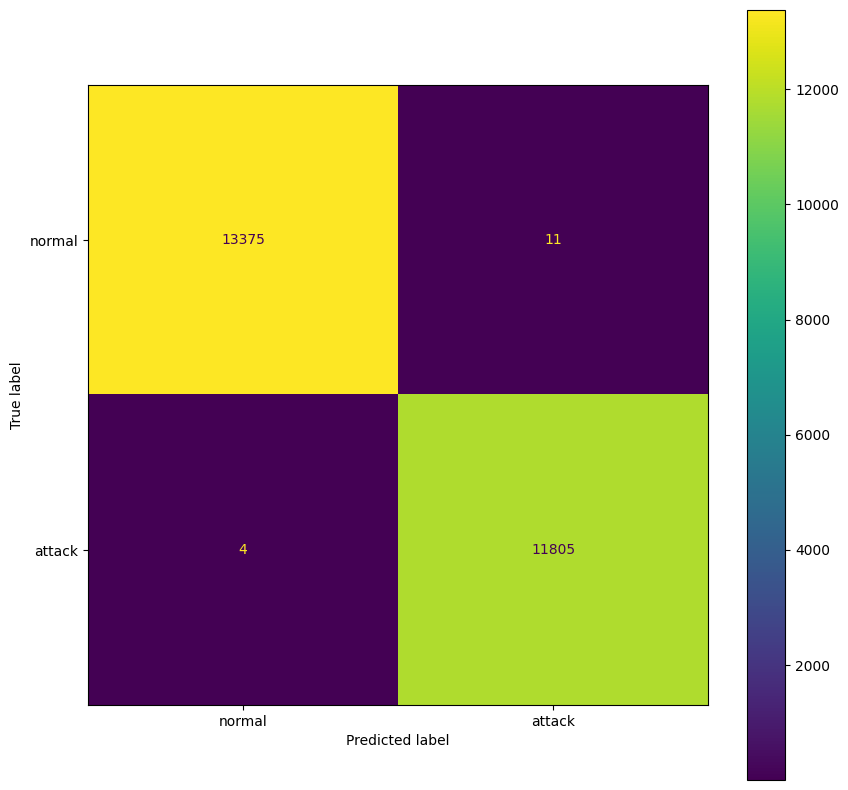

In [ ]:
# Adjusted parameter grid for further tuning
param_dist_adjusted = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Classifier
rf_adjusted = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with the adjusted parameters
random_search_adjusted = RandomizedSearchCV(estimator=rf_adjusted, param_distributions=param_dist_adjusted, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the randomized search model
random_search_adjusted.fit(x_train_reduced, y_train_reduced)

# Get the best parameters
best_params_adjusted = random_search_adjusted.best_params_
print(f"Best parameters (Adjusted): {best_params_adjusted}")

# Train the Random Forest with the adjusted best parameters
rf_best_adjusted = RandomForestClassifier(**best_params_adjusted, random_state=42)
rf_best_adjusted.fit(x_train_reduced, y_train_reduced)

# Evaluate the tuned model
evaluate_classification(rf_best_adjusted, "RF with PCA Features with Final Params", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

XGBoost

XGB with Features DT - Training accuracy: 0.9833
XGB with Features DT - Test accuracy: 0.9821
XGB with Features DT - Training precision: 0.9836
XGB with Features DT - Test precision: 0.9823
XGB with Features DT - Training recall: 0.9833
XGB with Features DT - Test recall: 0.9821
XGB with Features DT - Training F1 score: 0.9834
XGB with Features DT - Test F1 score: 0.9821
XGB with Features DT - Training time: 1.1164 seconds
XGB with Features DT - Testing time: 0.1803 seconds


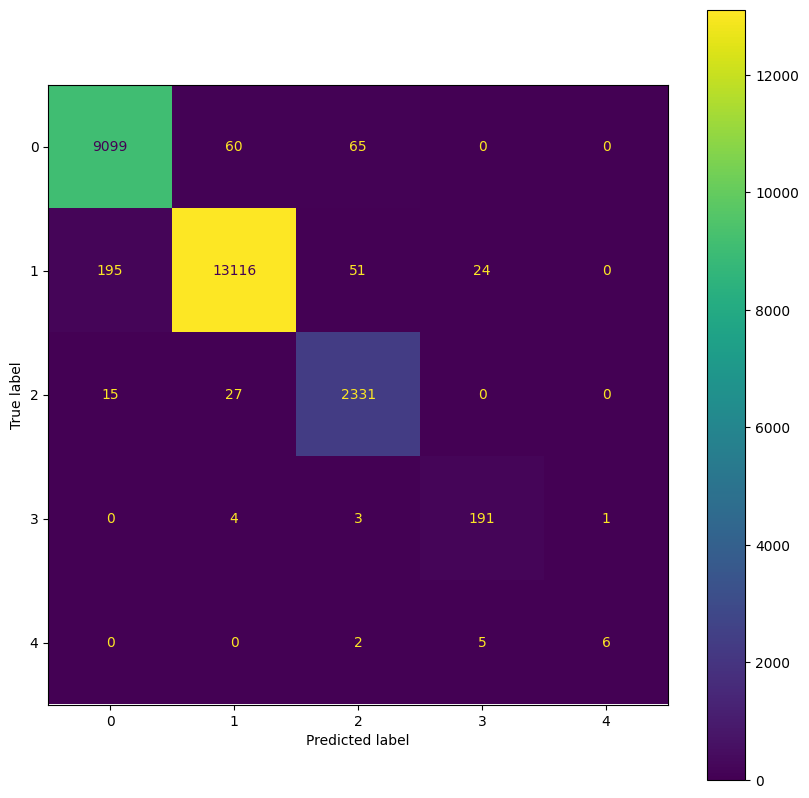

-----------------------------------------------------------------------------------------------------------------------------
XGB with PCA Features - Training accuracy: 0.9996
XGB with PCA Features - Test accuracy: 0.9988
XGB with PCA Features - Training precision: 0.9996
XGB with PCA Features - Test precision: 0.9988
XGB with PCA Features - Training recall: 0.9996
XGB with PCA Features - Test recall: 0.9988
XGB with PCA Features - Training F1 score: 0.9996
XGB with PCA Features - Test F1 score: 0.9988
XGB with PCA Features - Training time: 1.6048 seconds
XGB with PCA Features - Testing time: 0.1366 seconds


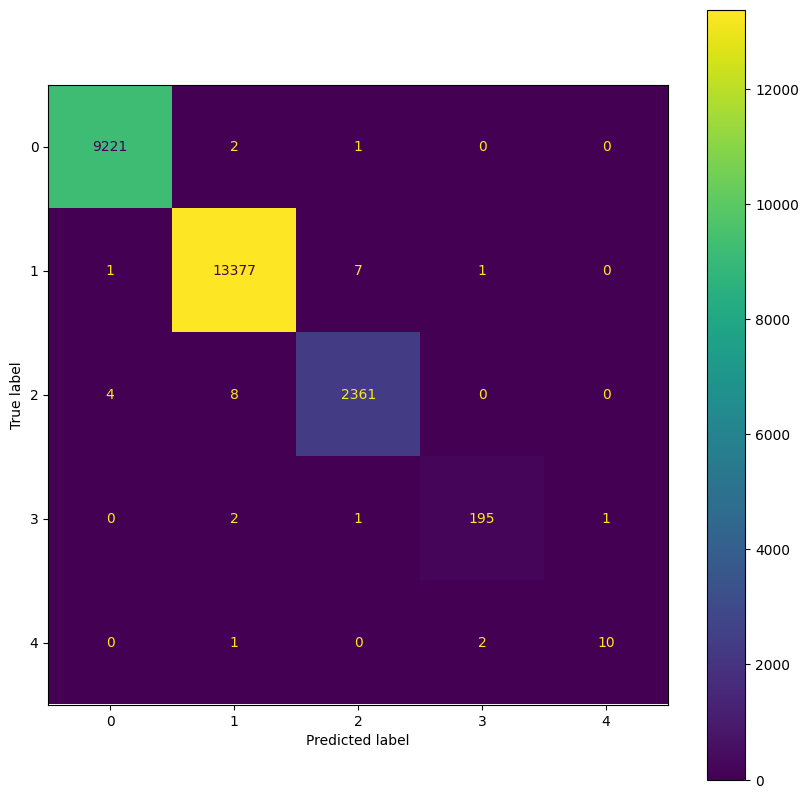

In [58]:
# Fit and evaluate RF model using manually selected features
xg_manual = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20).fit(x_train, y_train)
evaluate_classification(xg_manual, "XGB with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate RF model using PCA selected features
xg_pca = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20).fit(x_train_reduced, y_train_reduced)
evaluate_classification(xg_pca, "XGB with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Gradient Boosting Classifier

GB with Features DT - Training accuracy: 0.9789
GB with Features DT - Test accuracy: 0.9777
GB with Features DT - Training precision: 0.9789
GB with Features DT - Test precision: 0.9774
GB with Features DT - Training recall: 0.9789
GB with Features DT - Test recall: 0.9777
GB with Features DT - Training F1 score: 0.9787
GB with Features DT - Test F1 score: 0.9775
GB with Features DT - Training time: 46.3699 seconds
GB with Features DT - Testing time: 1.4691 seconds


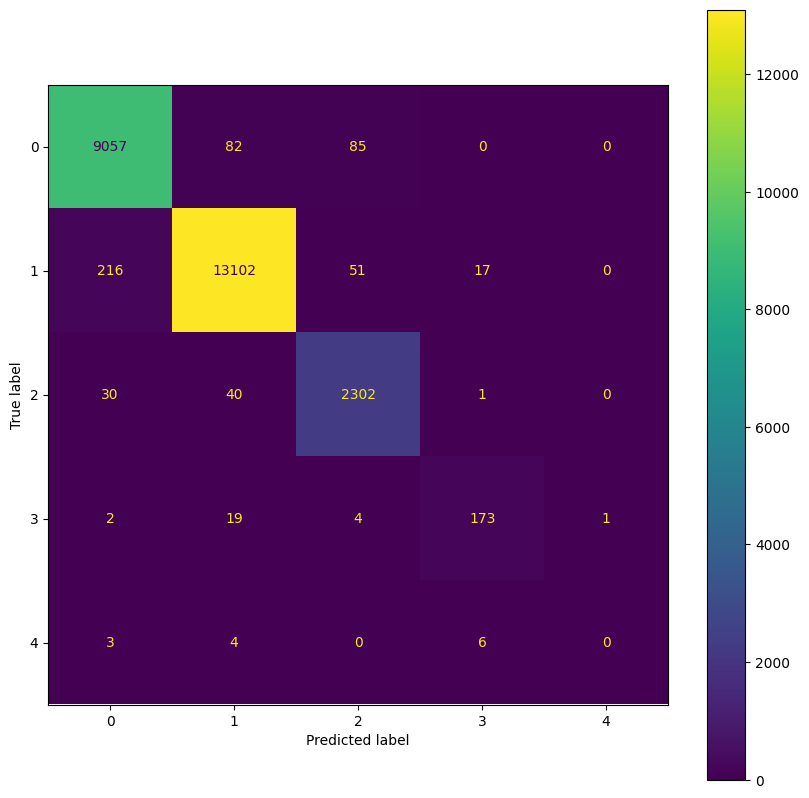

-----------------------------------------------------------------------------------------------------------------------------
GB with PCA Features - Training accuracy: 0.9981
GB with PCA Features - Test accuracy: 0.9964
GB with PCA Features - Training precision: 0.9981
GB with PCA Features - Test precision: 0.9962
GB with PCA Features - Training recall: 0.9981
GB with PCA Features - Test recall: 0.9964
GB with PCA Features - Training F1 score: 0.9981
GB with PCA Features - Test F1 score: 0.9963
GB with PCA Features - Training time: 1024.0613 seconds
GB with PCA Features - Testing time: 1.2887 seconds


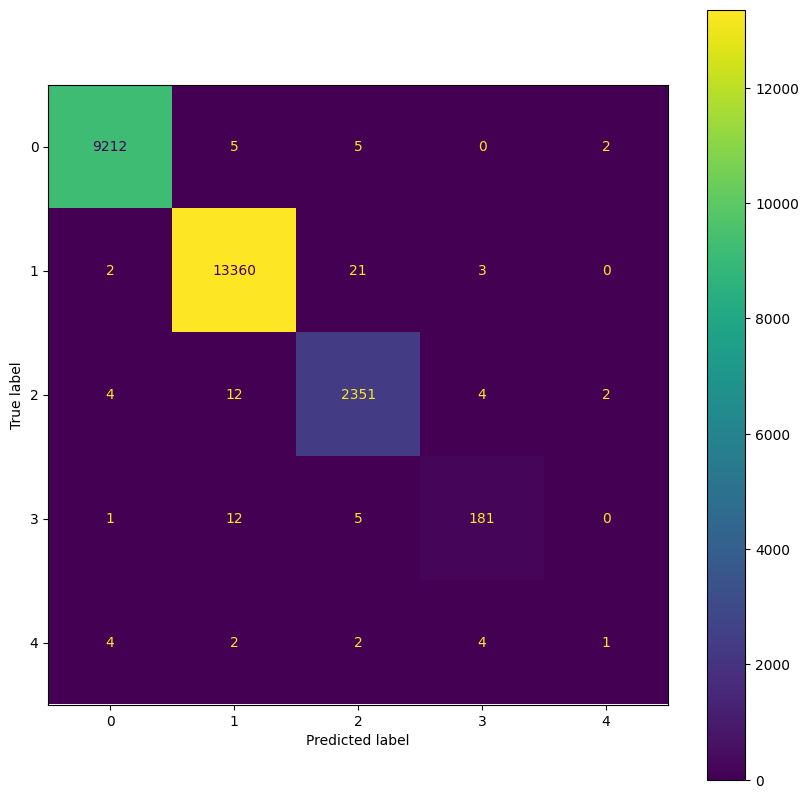

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit and evaluate GB model using manually selected features
gb_manual = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42).fit(x_train, y_train)
evaluate_classification(gb_manual, "GB with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate GB model using PCA selected features
gb_pca = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42).fit(x_train_reduced, y_train_reduced)
evaluate_classification(gb_pca, "GB with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

# Recurrent Neural Network (RNN) ==> (50 Epochs)

Columns Selected by Decision Tree

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

# Ensure that x_train and x_test are in float format
X_train1 = x_train.astype(np.float32)
X_test1 = x_test.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn1 = np.expand_dims(X_train1, axis=-1)
X_test_rnn1 = np.expand_dims(X_test1, axis=-1)

# Ensure labels are binary (0 and 1)
y_train_binary = (y_train > 0).astype(np.float32)
y_test_binary = (y_test > 0).astype(np.float32)

# Define RNN model
rnn_model1 = Sequential()
rnn_model1.add(SimpleRNN(50, input_shape=(X_train_rnn1.shape[1], X_train_rnn1.shape[2])))
rnn_model1.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model1.fit(X_train_rnn1, y_train_binary, epochs=50, batch_size=64, validation_data=(X_test_rnn1, y_test_binary))

Epoch 1/5
1575/1575 [==============================] - 12s 6ms/step - loss: 0.2658 - accuracy: 0.8931 - val_loss: 0.1818 - val_accuracy: 0.9251
Epoch 2/5
1575/1575 [==============================] - 10s 6ms/step - loss: 0.1625 - accuracy: 0.9355 - val_loss: 0.1423 - val_accuracy: 0.9464
Epoch 3/5
1575/1575 [==============================] - 9s 6ms/step - loss: 0.1272 - accuracy: 0.9509 - val_loss: 0.1136 - val_accuracy: 0.9628
Epoch 4/5
1575/1575 [==============================] - 10s 6ms/step - loss: 0.1041 - accuracy: 0.9607 - val_loss: 0.0923 - val_accuracy: 0.9705
Epoch 5/5
1575/1575 [==============================] - 10s 6ms/step - loss: 0.0894 - accuracy: 0.9663 - val_loss: 0.0840 - val_accuracy: 0.9711


Columns Selected by PCA Analysis

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

# Ensure that x_train_reduced and x_test_reduced are in float format
X_train2 = x_train_reduced.astype(np.float32)
X_test2 = x_test_reduced.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn2 = np.expand_dims(X_train2, axis=-1)
X_test_rnn2 = np.expand_dims(X_test2, axis=-1)

# Ensure labels are binary (0 and 1)
y_train_binary_reduced = (y_train_reduced > 0).astype(np.float32)
y_test_binary_reduced = (y_test_reduced > 0).astype(np.float32)

# Define RNN model
rnn_model2 = Sequential()
rnn_model2.add(SimpleRNN(50, input_shape=(X_train_rnn2.shape[1], X_train_rnn2.shape[2])))
rnn_model2.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model2.fit(X_train_rnn2, y_train_binary_reduced, epochs=50, batch_size=64, validation_data=(X_test_rnn2, y_test_binary_reduced))

Epoch 1/5
1575/1575 [==============================] - 16s 9ms/step - loss: 0.0410 - accuracy: 0.9851 - val_loss: 0.0196 - val_accuracy: 0.9933
Epoch 2/5
1575/1575 [==============================] - 15s 9ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0293 - val_accuracy: 0.9918
Epoch 3/5
1575/1575 [==============================] - 15s 9ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0076 - val_accuracy: 0.9977
Epoch 4/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0092 - val_accuracy: 0.9971
Epoch 5/5
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0067 - val_accuracy: 0.9976


# Convolutional Neural Network (CNN) ==> (50 Epochs)

Columns Selected by Decision Tree

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

X_train3 = x_train.astype(np.float32)
X_test3 = x_test.astype(np.float32)

# One-hot encode the target variable
y_train_reduced_encoded = to_categorical(y_train_reduced)
y_test_reduced_encoded = to_categorical(y_test_reduced)

# Reshape the data for CNN input
X_train_cnn3 = np.expand_dims(X_train3, axis=-1)
X_test_cnn3 = np.expand_dims(X_test3, axis=-1)


# Define CNN model
cnn_model3 = Sequential()
cnn_model3.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn3.shape[1], X_train_cnn3.shape[2])))
cnn_model3.add(MaxPooling1D(pool_size=2))
cnn_model3.add(Flatten())
cnn_model3.add(Dense(50, activation='relu'))
cnn_model3.add(Dense(y_train_reduced_encoded.shape[1], activation='softmax'))

# Compile the model
cnn_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model3.fit(X_train_cnn3, y_train_reduced_encoded, epochs=50, batch_size=64, validation_data=(X_test_cnn3, y_test_reduced_encoded))

Epoch 1/5
1575/1575 [==============================] - 9s 5ms/step - loss: 0.1219 - accuracy: 0.9532 - val_loss: 0.0950 - val_accuracy: 0.9638
Epoch 2/5
1575/1575 [==============================] - 7s 5ms/step - loss: 0.0913 - accuracy: 0.9615 - val_loss: 0.0898 - val_accuracy: 0.9586
Epoch 3/5
1575/1575 [==============================] - 7s 4ms/step - loss: 0.0846 - accuracy: 0.9639 - val_loss: 0.1076 - val_accuracy: 0.9566
Epoch 4/5
1575/1575 [==============================] - 7s 4ms/step - loss: 0.0807 - accuracy: 0.9656 - val_loss: 0.0749 - val_accuracy: 0.9686
Epoch 5/5
1575/1575 [==============================] - 7s 5ms/step - loss: 0.0754 - accuracy: 0.9687 - val_loss: 0.0813 - val_accuracy: 0.9615
CNN Test Accuracy with DT Features: 96.15%


Columns Selected by PCA

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Ensure the data is in float32 format
X_train4 = x_train_reduced.astype(np.float32)
X_test4 = x_test_reduced.astype(np.float32)

# One-hot encode the target variable
y_train_reduced_encoded = to_categorical(y_train_reduced)
y_test_reduced_encoded = to_categorical(y_test_reduced)

# Reshape the data for CNN input
X_train_cnn4 = np.expand_dims(X_train4, axis=-1)
X_test_cnn4 = np.expand_dims(X_test4, axis=-1)

# Define CNN model
cnn_model4 = Sequential()
cnn_model4.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn4.shape[1], X_train_cnn4.shape[2])))
cnn_model4.add(MaxPooling1D(pool_size=2))
cnn_model4.add(Flatten())
cnn_model4.add(Dense(50, activation='relu'))
cnn_model4.add(Dense(y_train_reduced_encoded.shape[1], activation='softmax'))

# Compile the model
cnn_model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model4.fit(X_train_cnn4, y_train_reduced_encoded, epochs=50, batch_size=64, validation_data=(X_test_cnn4, y_test_reduced_encoded))

# Evaluate the model
cnn_scores2 = cnn_model4.evaluate(X_test_cnn4, y_test_binary, verbose=0)
print(f'CNN Test Accuracy with DT Features: {cnn_scores2[1]*100:.2f}%')

Epoch 1/5
1575/1575 [==============================] - 12s 7ms/step - loss: 4.3540 - accuracy: 0.9274 - val_loss: 2.0498 - val_accuracy: 0.9562
Epoch 2/5
1575/1575 [==============================] - 10s 6ms/step - loss: 1.3076 - accuracy: 0.9599 - val_loss: 0.7879 - val_accuracy: 0.9648
Epoch 3/5
1575/1575 [==============================] - 10s 7ms/step - loss: 0.9154 - accuracy: 0.9589 - val_loss: 1.0335 - val_accuracy: 0.9627
Epoch 4/5
1575/1575 [==============================] - 10s 6ms/step - loss: 0.4438 - accuracy: 0.9638 - val_loss: 0.4335 - val_accuracy: 0.9680
Epoch 5/5
1575/1575 [==============================] - 11s 7ms/step - loss: 0.3024 - accuracy: 0.9640 - val_loss: 0.3196 - val_accuracy: 0.9622


# Comparison Between Model

Accuracy

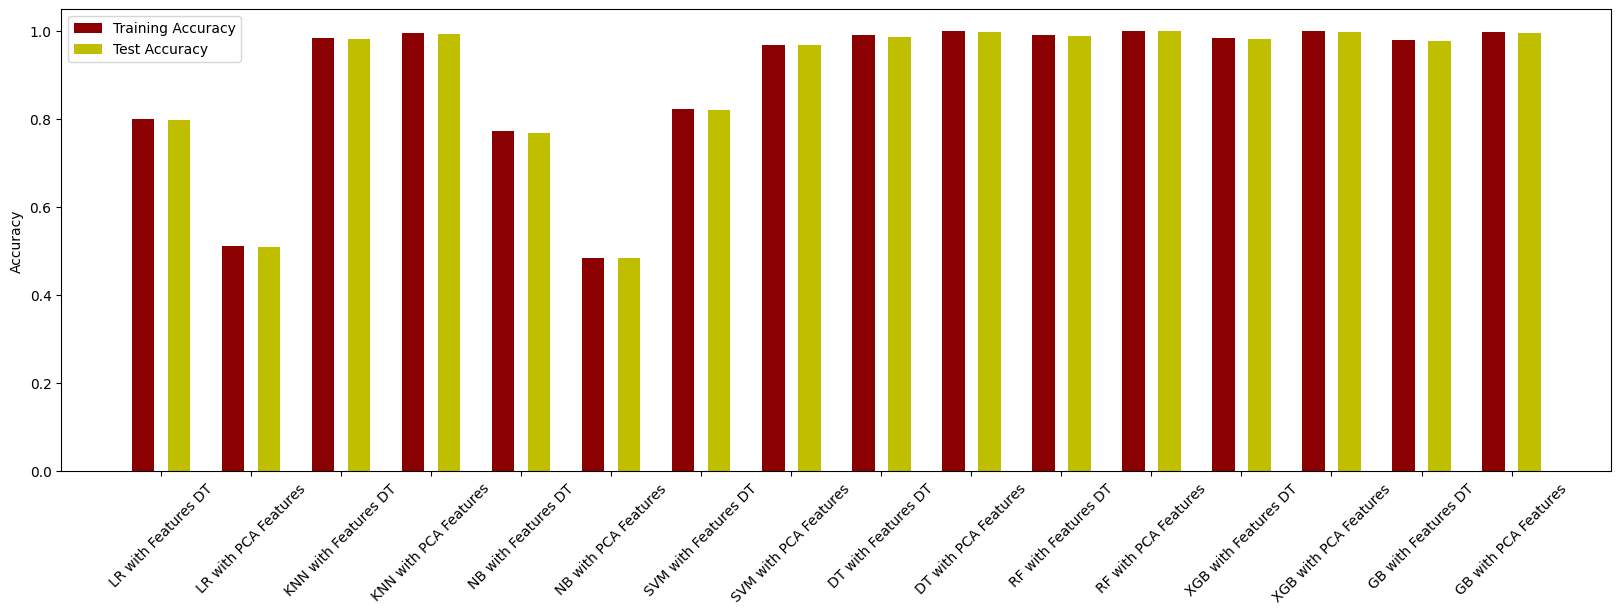

In [60]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

Precesion

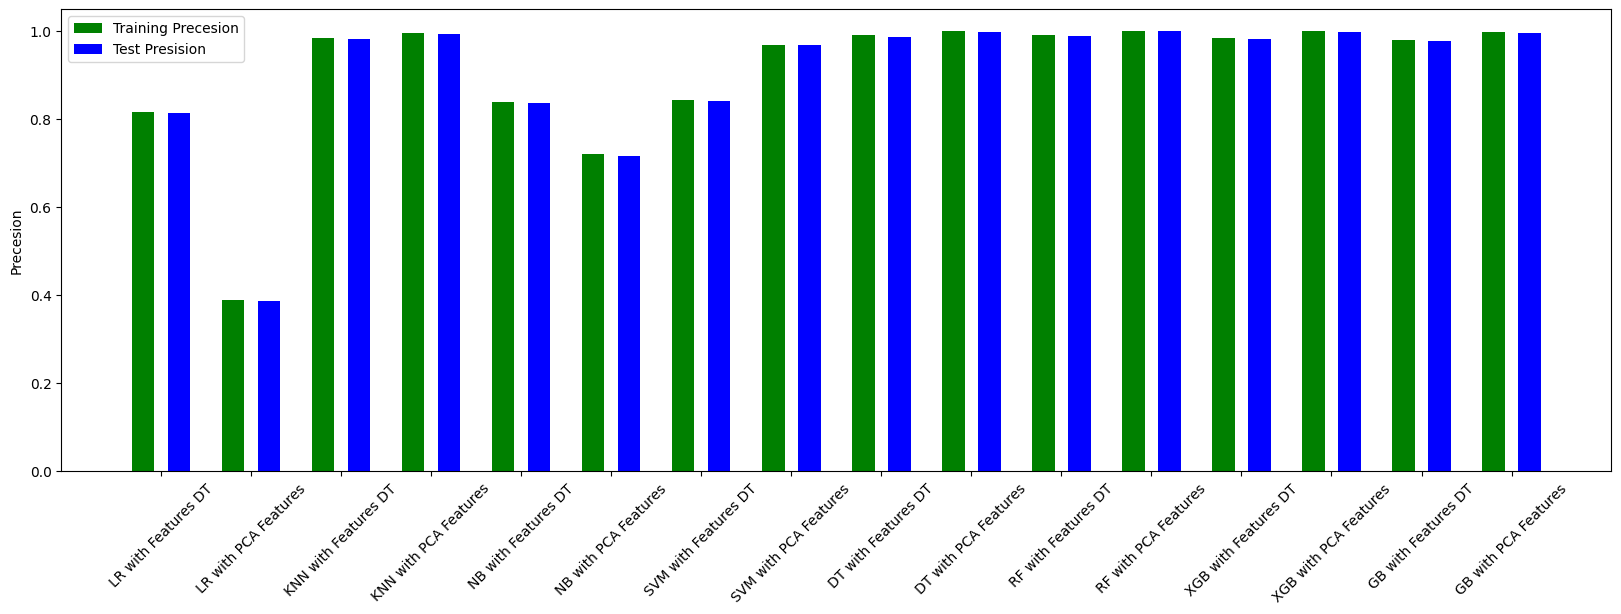

In [61]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.xticks(rotation=45)
plt.show()

Recall

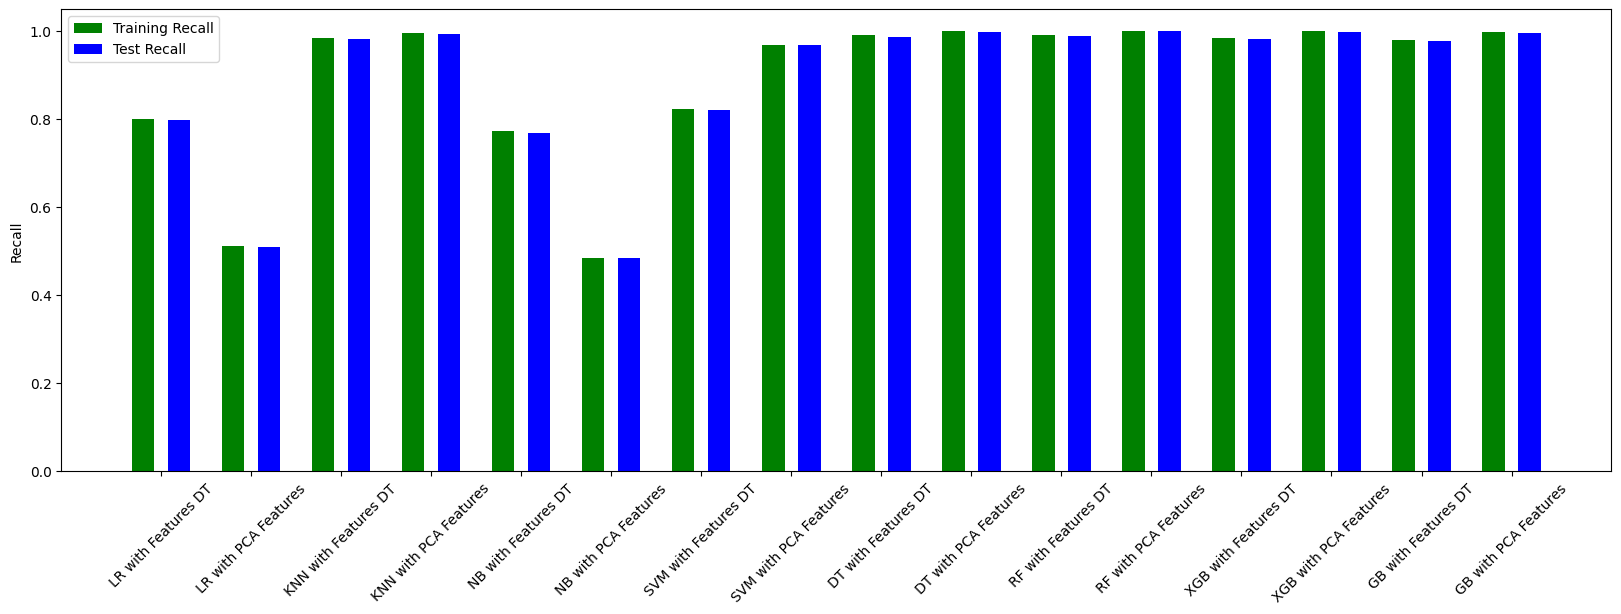

In [62]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[4] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[5] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.xticks(rotation=45)
plt.show()

Execution Time

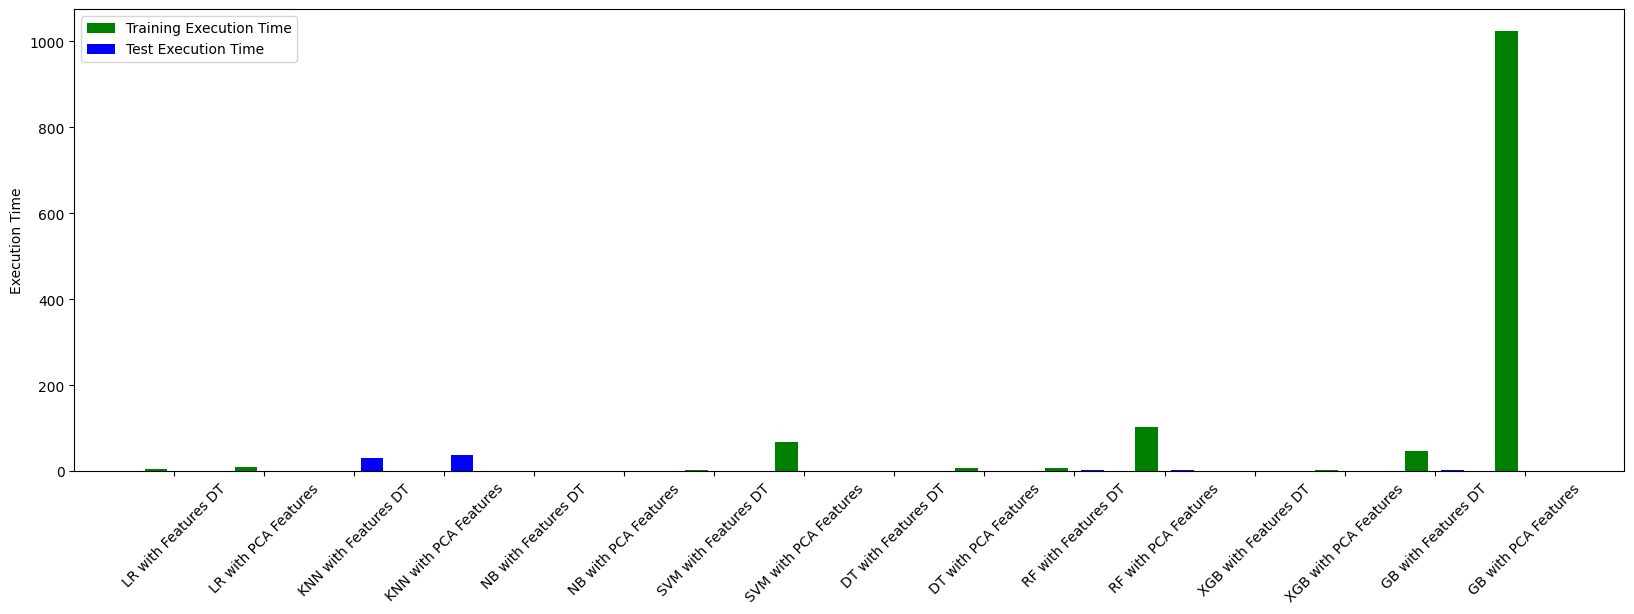

In [63]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[6] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[7] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Execution Time", "Test Execution Time"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Execution Time")
plt.xticks(rotation=45)
plt.show()